In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ticker = ["SPY", "AAPL", "KO", "IBM", "DIS", "MSFT"]

stocks = yf.download(ticker, start = "2010-01-01", end = "2021-01-01")

[*********************100%%**********************]  6 of 6 completed


In [8]:
stocks.to_csv("stocksYT.csv")

stocks = pd.read_csv("stocksYT.csv", header = [0,1], index_col=[0], parse_dates=[0])

In [5]:
# convert multi index to tuple
#stocks.columns=stocks.columns.to_flat_index()

In [24]:
close = stocks.loc[:, "Close"].copy()

normal_close = close.div(close.iloc[0]).mul(100)


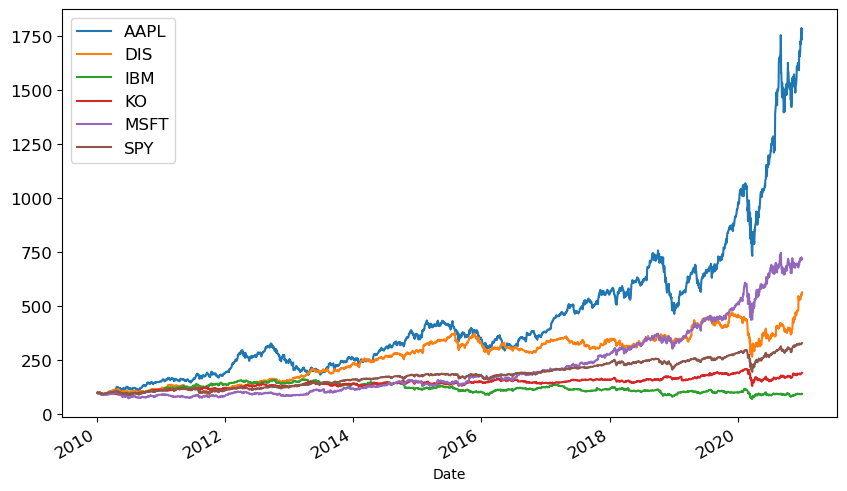

In [26]:
normal_close.plot(figsize=(10,6), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [11]:
aapl = close.AAPL.copy().to_frame()

In [12]:
ret = close.pct_change().dropna()

In [13]:
daily_mean_return = ret.mean()
var_daily = ret.var()
std_daily = np.sqrt(var_daily)

In [14]:
annual_mean_ret = daily_mean_return*252
annual_var_ret = var_daily*252
annual_std_ret = np.sqrt(annual_var_ret)

In [16]:
summary = ret.describe().T.loc[:, ["mean", "std"]]

summary["mean"]=summary["mean"]*252
summary["std"]=summary["std"]*np.sqrt(252)
summary

mean       std
Ticker                    
AAPL    0.300134  0.283242
DIS     0.188696  0.249504
IBM     0.020648  0.224345
KO      0.075091  0.176009
MSFT    0.211915  0.254185
SPY     0.123754  0.173170

Text(0.5, 1.0, 'Risk/Retrun')

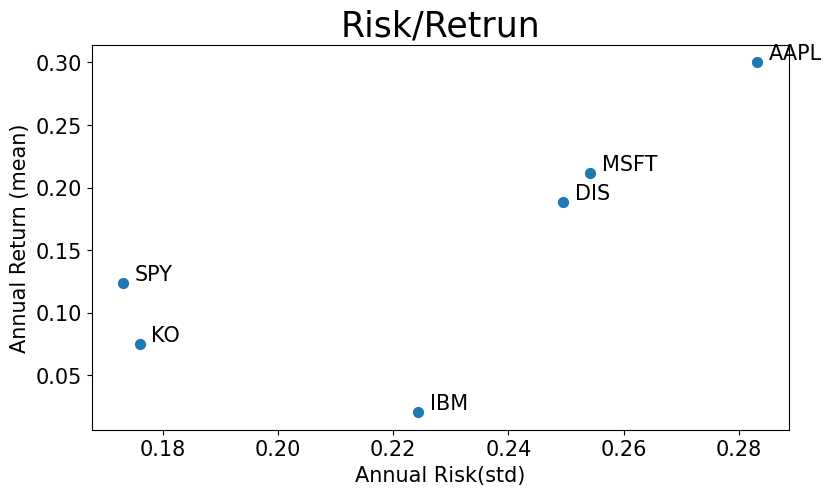

In [27]:
summary.plot.scatter(x='std', y='mean', figsize=(9,5), s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,"std"]+0.002, summary.loc[i, 'mean']+0.002), size=15)
plt.xlabel("Annual Risk(std)", fontsize=15)
plt.ylabel('Annual Return (mean)', fontsize = 15)
plt.title("Risk/Retrun", fontsize=25)

## Correlation and Covariance

In [28]:
ret

Ticker          AAPL       DIS       IBM        KO      MSFT       SPY
Date                                                                  
2010-01-05  0.001729 -0.002495 -0.012080 -0.012097  0.000323  0.002647
2010-01-06 -0.015906 -0.005314 -0.006496 -0.000355 -0.006137  0.000704
2010-01-07 -0.001849  0.000314 -0.003462 -0.002485 -0.010400  0.004221
2010-01-08  0.006648  0.001571  0.010035 -0.018509  0.006897  0.003328
2010-01-11 -0.008821 -0.016311 -0.010470  0.020308 -0.012720  0.001397
...              ...       ...       ...       ...       ...       ...
2020-12-24  0.007712  0.001037  0.006376  0.006782  0.007827  0.003890
2020-12-28  0.035766  0.029529  0.001043  0.013473  0.009921  0.008591
2020-12-29 -0.013315 -0.008722 -0.008172 -0.000554 -0.003601 -0.001908
2020-12-30 -0.008527  0.021827  0.004362  0.005727 -0.011019  0.001427
2020-12-31 -0.007703  0.000055  0.012385  0.007348  0.003338  0.005081

[2768 rows x 6 columns]

In [29]:
ret.cov()

Ticker      AAPL       DIS       IBM        KO      MSFT       SPY
Ticker                                                            
AAPL    0.000318  0.000115  0.000110  0.000067  0.000158  0.000128
DIS     0.000115  0.000247  0.000111  0.000085  0.000121  0.000121
IBM     0.000110  0.000111  0.000200  0.000079  0.000121  0.000108
KO      0.000067  0.000085  0.000079  0.000123  0.000076  0.000077
MSFT    0.000158  0.000121  0.000121  0.000076  0.000256  0.000130
SPY     0.000128  0.000121  0.000108  0.000077  0.000130  0.000119

In [38]:
ret.corr()

Ticker      AAPL       DIS       IBM        KO      MSFT       SPY
Ticker                                                            
AAPL    1.000000  0.408513  0.436100  0.339213  0.554051  0.659557
DIS     0.408513  1.000000  0.497775  0.486514  0.480457  0.706726
IBM     0.436100  0.497775  1.000000  0.502436  0.533130  0.703342
KO      0.339213  0.486514  0.502436  1.000000  0.429749  0.639324
MSFT    0.554051  0.480457  0.533130  0.429749  1.000000  0.744601
SPY     0.659557  0.706726  0.703342  0.639324  0.744601  1.000000

In [31]:
import seaborn as sns

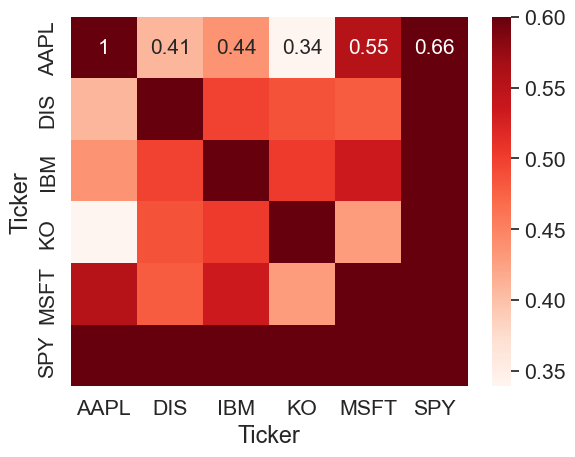

In [39]:
plt.figure()
sns.heatmap(ret.corr(), cmap='Reds', annot=True, annot_kws={"size":15}, vmax=0.6)
plt.show()

In [41]:
ticker_challenge = ["AAPL", "NIO", "AMD", "TSLA", "INTC", "RIVN", "F", "GOLD", "CPNG", "TCN", "BAC", "NVDA", "MARA", "PLTR", "SOFI", "PFE", "AAL", "AMZN", "CCL", "VALE"]

stocks_challenge = yf.download(ticker_challenge, start = "2022-01-01", end = "2024-01-01")

[*********************100%%**********************]  20 of 20 completed


In [42]:
stocks_challenge.to_csv("stocksYT_chall.csv")

stocks_challenge = pd.read_csv("stocksYT_chall.csv", header = [0,1], index_col=[0], parse_dates=[0])

stocks_challenge

Price       Adj Close                                                 \
Ticker            AAL        AAPL         AMD        AMZN        BAC   
Date                                                                   
2022-01-03  18.750000  179.724564  150.240005  170.404495  43.460327   
2022-01-04  19.020000  177.443573  144.419998  167.522003  45.163734   
2022-01-05  18.680000  172.723572  136.149994  164.356995  44.401440   
2022-01-06  18.570000  169.840240  136.229996  163.253998  45.295494   
2022-01-07  19.280001  170.008118  132.000000  162.554001  46.283653   
...               ...         ...         ...         ...        ...   
2023-12-22  14.310000  193.353287  139.600006  153.419998  33.196156   
2023-12-26  14.110000  192.803986  143.410004  153.410004  33.623150   
2023-12-27  13.990000  192.903839  146.070007  153.339996  33.603287   
2023-12-28  13.980000  193.333298  148.759995  153.380005  33.643009   
2023-12-29  13.740000  192.284637  147.410004  151.940002  33.434475   

Price                                                              ...  \
Ticker            CCL       CPNG          F       GOLD       INTC  ...   
Date                                                               ...   
2022-01-03  21.410000  28.719999  18.578035  17.326042  49.865265  ...   
2022-01-04  21.730000  26.410000  20.745615  17.503599  49.799664  ...   
2022-01-05  21.170000  25.610001  20.190926  17.354074  50.483780  ...   
2022-01-06  21.070000  25.660000  20.873621  16.840088  50.614975  ...   
2022-01-07  21.900000  25.969999  20.856556  16.914850  50.080811  ...   
...               ...        ...        ...        ...        ...  ...   
2023-12-22  18.930000  16.209999  12.025517  18.034845  47.859715  ...   
2023-12-26  18.610001  16.000000  12.122890  18.044777  50.352409  ...   
2023-12-27  18.540001  16.139999  12.064466  18.342709  50.611649  ...   
2023-12-28  18.670000  16.370001  12.015780  17.965328  50.242729  ...   
2023-12-29  18.540001  16.190001  11.869720  17.965328  50.103138  ...   

Price          Volume                                                     \
Ticker           MARA        NIO      NVDA       PFE      PLTR      RIVN   
Date                                                                       
2022-01-03    6798800   64286500  39154700  57219200  34283600   8346800   
2022-01-04   10570500   47866800  52715400  66993100  39643200  12152200   
2022-01-05   15872200   42442700  49806400  52956400  58445900  18645100   
2022-01-06   10608000   48723200  45418600  37000400  49737100  39827100   
2022-01-07    9316400   40781500  40993900  27703400  37989300  17515900   
...               ...        ...       ...       ...       ...       ...   
2023-12-22  118192600   55866700  25213900  35087200  33615000  23959000   
2023-12-26   79566200  130928200  24420000  30119100  31750700  30450100   
2023-12-27  106789700   99997200  23364800  35000700  32918400  22593300   
2023-12-28  119982200   91988300  24658700  30472900  38990000  25289500   
2023-12-29  144398300   74559000  38869000  30342500  38805000  21327900   

Price                                               
Ticker          SOFI      TCN       TSLA      VALE  
Date                                                
2022-01-03  27500900   124800  103931400  20177800  
2022-01-04  34175900   261700  100248300  41351400  
2022-01-05  35103100   637200   80119800  58210800  
2022-01-06  46269400   771100   90336600  29066000  
2022-01-07  28716200   396200   84164700  45638800  
...              ...      ...        ...       ...  
2023-12-22  29080400  1556900   93249800  15425500  
2023-12-26  26013700  1166400   86892400  13122500  
2023-12-27  44253700  3282000  106494400  12392100  
2023-12-28  26416400   748600  113619900   9426600  
2023-12-29  38152600   912600  100615300   9238200  

[501 rows x 120 columns]

In [63]:
close_challenge = stocks_challenge.loc[:, "Close"].copy()

normal_close_challenge = close_challenge.div(close_challenge.iloc[0]).mul(100)
normal_close_challenge

Ticker             AAL        AAPL         AMD        AMZN         BAC  \
Date                                                                     
2022-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2022-01-04  101.440002   98.730840   96.126193   98.308441  103.919449   
2022-01-05   99.626668   96.104612   90.621665   96.451091  102.165440   
2022-01-06   99.039998   94.500305   90.674914   95.803809  104.222609   
2022-01-07  102.826670   94.593705   87.859422   95.393024  106.496319   
...                ...         ...         ...         ...         ...   
2023-12-22   76.320002  106.367789   92.917999   90.032835   72.390645   
2023-12-26   75.253332  106.065606   95.453939   90.026970   73.321785   
2023-12-27   74.613332  106.120543   97.224442   89.985887   73.278475   
2023-12-28   74.559998  106.356798   99.014902   90.009365   73.365095   
2023-12-29   73.279999  105.779905   98.116346   89.164316   72.910346   

Ticker             CCL        CPNG           F        GOLD        INTC  \
Date                                                                     
2022-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2022-01-04  101.494627   91.956826  111.667427  101.024804   99.868446   
2022-01-05   98.879030   89.171313  108.681669  100.161806  101.240368   
2022-01-06   98.411956   89.345406  112.356447   97.195251  101.503475   
2022-01-07  102.288649   90.424791  112.264584   97.626750  100.432249   
...                ...         ...         ...         ...         ...   
2023-12-22   88.416630   56.441502   56.729445   97.950372   90.208609   
2023-12-26   86.922003   55.710308   57.188790   98.004311   94.906974   
2023-12-27   86.595054   56.197771   56.913184   99.622429   95.395601   
2023-12-28   87.202243   56.998612   56.683509   97.572812   94.700245   
2023-12-29   86.595054   56.371870   55.994485   97.572812   94.437138   

Ticker            MARA         NIO        NVDA         PFE        PLTR  \
Date                                                                     
2022-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2022-01-04  103.770148   94.353148   97.241128   96.257718   98.057201   
2022-01-05   90.057773   89.273971   91.643709   98.199470   91.527245   
2022-01-06   89.084828   87.570954   93.549353   96.804940   90.339985   
2022-01-07   86.622074   87.541076   90.458487   98.358340   89.368585   
...                ...         ...         ...         ...         ...   
2023-12-22   81.210093   25.156856  162.112812   50.132390   93.955743   
2023-12-26   81.970202   27.875708  163.603473   50.150043   95.412842   
2023-12-27   94.466404   27.188527  164.061627   50.503089   94.279539   
2023-12-28   85.466711   28.174484  164.410217   50.820830   94.765239   
2023-12-29   71.419885   27.098893  164.410217   50.820830   92.660547   

Ticker            RIVN        SOFI         TCN        TSLA        VALE  
Date                                                                    
2022-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  
2022-01-04   98.705216   95.982142   99.600802   95.816730   98.117305  
2022-01-05   87.626559   89.923470   99.068534   90.693293   98.913826  
2022-01-06   85.017524   87.882650  102.062544   88.741268  101.448224  
2022-01-07   83.995325   87.627548  100.332669   85.595694  107.241129  
...                ...         ...         ...         ...         ...  
2023-12-22   22.595404   61.926019   60.878242   63.146575  113.975375  
2023-12-26   22.965343   63.520407   61.410510   64.164260  115.351193  
2023-12-27   23.101635   65.816323   62.009314   65.371986  115.930483  
2023-12-28   22.916667   65.561222   61.277446   63.306604  115.061549  
2023-12-29   22.838784   63.456630   60.545579   62.131390  114.844310  

[501 rows x 20 columns]

In [48]:
ret_challenge = close_challenge.pct_change().dropna()
ret_challenge

Ticker           AAL      AAPL       AMD      AMZN       BAC       CCL  \
Date                                                                     
2022-01-04  0.014400 -0.012692 -0.038738 -0.016916  0.039194  0.014946   
2022-01-05 -0.017876 -0.026600 -0.057264 -0.018893 -0.016879 -0.025771   
2022-01-06 -0.005889 -0.016693  0.000588 -0.006711  0.020136 -0.004724   
2022-01-07  0.038234  0.000988 -0.031050 -0.004288  0.021816  0.039392   
2022-01-10 -0.025415  0.000116  0.000000 -0.006570 -0.005083 -0.022831   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -0.002787 -0.005547 -0.002216 -0.002730  0.006928 -0.013549   
2023-12-26 -0.013976 -0.002841  0.027292 -0.000065  0.012863 -0.016904   
2023-12-27 -0.008505  0.000518  0.018548 -0.000456 -0.000591 -0.003761   
2023-12-28 -0.000715  0.002226  0.018416  0.000261  0.001182  0.007012   
2023-12-29 -0.017167 -0.005424 -0.009075 -0.009388 -0.006198 -0.006963   

Ticker          CPNG         F      GOLD      INTC      MARA       NIO  \
Date                                                                     
2022-01-04 -0.080432  0.116674  0.010248 -0.001316  0.037701 -0.056469   
2022-01-05 -0.030292 -0.026738 -0.008542  0.013737 -0.132142 -0.053832   
2022-01-06  0.001952  0.033812 -0.029618  0.002599 -0.010804 -0.019076   
2022-01-07  0.012081 -0.000818  0.004440 -0.010554 -0.027645 -0.000341   
2022-01-10 -0.071236 -0.024141  0.028729  0.033121  0.015444 -0.013311   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.001235  0.000810  0.010573  0.019541  0.077885  0.015682   
2023-12-26 -0.012955  0.008097  0.000551  0.052083  0.009360  0.108076   
2023-12-27  0.008750 -0.004819  0.016511  0.005148  0.152448 -0.024652   
2023-12-28  0.014250 -0.004036 -0.020574 -0.007289 -0.095269  0.036264   
2023-12-29 -0.010996 -0.012156  0.000000 -0.002778 -0.164354 -0.038176   

Ticker          NVDA       PFE      PLTR      RIVN      SOFI       TCN  \
Date                                                                     
2022-01-04 -0.027589 -0.037423 -0.019428 -0.012948 -0.040179 -0.003992   
2022-01-05 -0.057562  0.020172 -0.066593 -0.112240 -0.063123 -0.005344   
2022-01-06  0.020794 -0.014201 -0.012972 -0.029774 -0.022695  0.030222   
2022-01-07 -0.033040  0.016047 -0.010753 -0.012023 -0.002903 -0.016949   
2022-01-10  0.005615  0.009332 -0.003623 -0.056096 -0.026929 -0.008621   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -0.003266  0.003179 -0.010233 -0.015691  0.007261  0.014412   
2023-12-26  0.009195  0.000352  0.015508  0.016372  0.025747  0.008743   
2023-12-27  0.002800  0.007040 -0.011878  0.005935  0.036145  0.009751   
2023-12-28  0.002125  0.006292  0.005152 -0.008007 -0.003876 -0.011803   
2023-12-29  0.000000  0.000000 -0.022210 -0.003399 -0.032101 -0.011944   

Ticker          TSLA      VALE  
Date                            
2022-01-04 -0.041833 -0.018827  
2022-01-05 -0.053471  0.008118  
2022-01-06 -0.021523  0.025622  
2022-01-07 -0.035447  0.057102  
2022-01-10  0.030342 -0.010804  
...              ...       ...  
2023-12-22 -0.007701 -0.001902  
2023-12-26  0.016116  0.012071  
2023-12-27  0.018822  0.005022  
2023-12-28 -0.031594 -0.007495  
2023-12-29 -0.018564 -0.001888  

[500 rows x 20 columns]

In [49]:
daily_mean_return_challenge = ret_challenge.mean()
var_daily_challenge = ret_challenge.var()
std_daily_challenge = np.sqrt(var_daily_challenge)

In [50]:
summary_challenge = ret_challenge.describe().T.loc[:, ["mean", "std"]]

summary_challenge["mean"]= summary_challenge["mean"]*252
summary_challenge["std"]=summary_challenge["std"]*np.sqrt(252)
summary_challenge

mean       std
Ticker                    
AAL    -0.046807  0.469021
AAPL    0.070428  0.290727
AMD     0.138926  0.546040
AMZN    0.032631  0.425745
BAC    -0.115191  0.297458
CCL     0.140527  0.649813
CPNG   -0.076599  0.652751
F      -0.199601  0.428955
GOLD    0.046675  0.345049
INTC    0.045243  0.385830
MARA    0.536252  1.206558
NIO    -0.331517  0.813530
NVDA    0.407876  0.566018
PFE    -0.309490  0.250784
PLTR    0.212697  0.712758
RIVN   -0.407255  0.818288
SOFI    0.038037  0.739645
TCN    -0.197294  0.333596
TSLA   -0.057965  0.601730
VALE    0.151505  0.405901

Text(0.5, 1.0, 'Risk/Retrun')

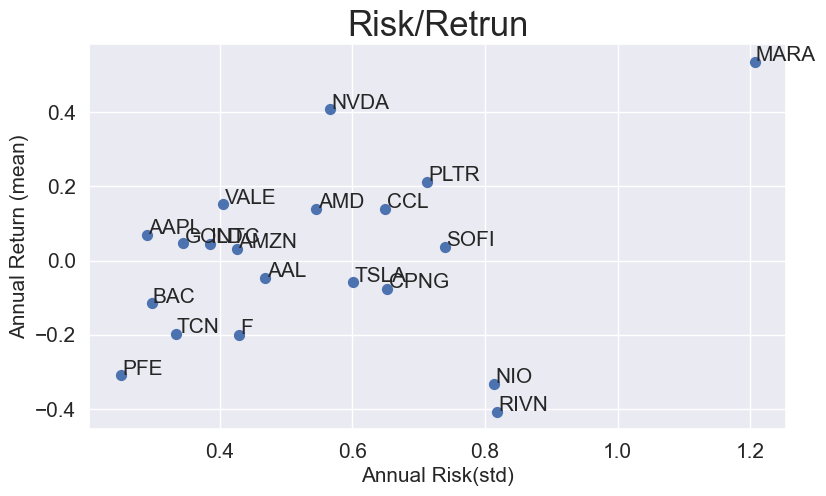

In [51]:
summary_challenge.plot.scatter(x='std', y='mean', figsize=(9,5), s=50, fontsize=15)
for i in summary_challenge.index:
    plt.annotate(i, xy=(summary_challenge.loc[i,"std"]+0.002, summary_challenge.loc[i, 'mean']+0.002), size=15)
plt.xlabel("Annual Risk(std)", fontsize=15)
plt.ylabel('Annual Return (mean)', fontsize = 15)
plt.title("Risk/Retrun", fontsize=25)

In [52]:
ret_challenge.cov()

Ticker       AAL      AAPL       AMD      AMZN       BAC       CCL      CPNG  \
Ticker                                                                         
AAL     0.000873  0.000270  0.000515  0.000360  0.000283  0.000897  0.000531   
AAPL    0.000270  0.000335  0.000395  0.000305  0.000152  0.000369  0.000345   
AMD     0.000515  0.000395  0.001183  0.000561  0.000261  0.000729  0.000605   
AMZN    0.000360  0.000305  0.000561  0.000719  0.000207  0.000514  0.000530   
BAC     0.000283  0.000152  0.000261  0.000207  0.000351  0.000373  0.000285   
CCL     0.000897  0.000369  0.000729  0.000514  0.000373  0.001676  0.000695   
CPNG    0.000531  0.000345  0.000605  0.000530  0.000285  0.000695  0.001691   
F       0.000460  0.000232  0.000442  0.000284  0.000266  0.000630  0.000428   
GOLD    0.000027  0.000064  0.000108  0.000126  0.000061  0.000066  0.000133   
INTC    0.000284  0.000250  0.000503  0.000295  0.000165  0.000402  0.000346   
MARA    0.000951  0.000612  0.001113  0.000910  0.000493  0.001369  0.001258   
NIO     0.000679  0.000406  0.000813  0.000592  0.000353  0.001028  0.001018   
NVDA    0.000572  0.000433  0.000992  0.000574  0.000268  0.000782  0.000644   
PFE     0.000058  0.000075  0.000088  0.000081  0.000076  0.000119  0.000059   
PLTR    0.000576  0.000409  0.000843  0.000676  0.000296  0.000903  0.000854   
RIVN    0.000675  0.000431  0.000894  0.000639  0.000358  0.000981  0.001067   
SOFI    0.000635  0.000380  0.000718  0.000574  0.000345  0.000918  0.000830   
TCN     0.000269  0.000186  0.000291  0.000254  0.000218  0.000410  0.000293   
TSLA    0.000518  0.000401  0.000691  0.000516  0.000262  0.000736  0.000643   
VALE    0.000123  0.000078  0.000170  0.000151  0.000140  0.000200  0.000148   

Ticker         F      GOLD      INTC      MARA       NIO      NVDA       PFE  \
Ticker                                                                         
AAL     0.000460  0.000027  0.000284  0.000951  0.000679  0.000572  0.000058   
AAPL    0.000232  0.000064  0.000250  0.000612  0.000406  0.000433  0.000075   
AMD     0.000442  0.000108  0.000503  0.001113  0.000813  0.000992  0.000088   
AMZN    0.000284  0.000126  0.000295  0.000910  0.000592  0.000574  0.000081   
BAC     0.000266  0.000061  0.000165  0.000493  0.000353  0.000268  0.000076   
CCL     0.000630  0.000066  0.000402  0.001369  0.001028  0.000782  0.000119   
CPNG    0.000428  0.000133  0.000346  0.001258  0.001018  0.000644  0.000059   
F       0.000730  0.000060  0.000238  0.000794  0.000552  0.000475  0.000081   
GOLD    0.000060  0.000472  0.000111  0.000381  0.000154  0.000092  0.000035   
INTC    0.000238  0.000111  0.000591  0.000683  0.000494  0.000446  0.000091   
MARA    0.000794  0.000381  0.000683  0.005777  0.001591  0.001283  0.000084   
NIO     0.000552  0.000154  0.000494  0.001591  0.002626  0.000828  0.000125   
NVDA    0.000475  0.000092  0.000446  0.001283  0.000828  0.001271  0.000089   
PFE     0.000081  0.000035  0.000091  0.000084  0.000125  0.000089  0.000250   
PLTR    0.000510  0.000105  0.000439  0.001646  0.001129  0.000932  0.000062   
RIVN    0.000677  0.000107  0.000436  0.001909  0.001540  0.000924  0.000066   
SOFI    0.000515  0.000161  0.000435  0.001656  0.001199  0.000725  0.000088   
TCN     0.000303  0.000121  0.000211  0.000578  0.000400  0.000293  0.000085   
TSLA    0.000465  0.000059  0.000345  0.001460  0.001051  0.000782  0.000070   
VALE    0.000142  0.000177  0.000141  0.000369  0.000408  0.000167  0.000072   

Ticker      PLTR      RIVN      SOFI       TCN      TSLA      VALE  
Ticker                                                              
AAL     0.000576  0.000675  0.000635  0.000269  0.000518  0.000123  
AAPL    0.000409  0.000431  0.000380  0.000186  0.000401  0.000078  
AMD     0.000843  0.000894  0.000718  0.000291  0.000691  0.000170  
AMZN    0.000676  0.000639  0.000574  0.000254  0.000516  0.000151  
BAC     0.000296  0.000358  0.000345  0.000218  0.000262  0.0001

In [53]:
ret_challenge.corr()

Ticker       AAL      AAPL       AMD      AMZN       BAC       CCL      CPNG  \
Ticker                                                                         
AAL     1.000000  0.499248  0.506968  0.454069  0.511415  0.741439  0.437485   
AAPL    0.499248  1.000000  0.627518  0.621651  0.442883  0.491908  0.458549   
AMD     0.506968  0.627518  1.000000  0.608528  0.405351  0.517768  0.427658   
AMZN    0.454069  0.621651  0.608528  1.000000  0.412569  0.468241  0.480715   
BAC     0.511415  0.442883  0.405351  0.412569  1.000000  0.486051  0.370131   
CCL     0.741439  0.491908  0.517768  0.468241  0.486051  1.000000  0.413177   
CPNG    0.437485  0.458549  0.427658  0.480715  0.370131  0.413177  1.000000   
F       0.576434  0.469345  0.475455  0.391617  0.526033  0.569540  0.385610   
GOLD    0.041399  0.161947  0.143855  0.216669  0.148910  0.074572  0.149141   
INTC    0.395361  0.560579  0.601893  0.452060  0.361660  0.403574  0.346233   
MARA    0.423648  0.439962  0.425694  0.446243  0.346223  0.439944  0.402550   
NIO     0.448502  0.432458  0.461456  0.431083  0.368045  0.490233  0.483234   
NVDA    0.542749  0.663297  0.808475  0.599802  0.401871  0.536115  0.439218   
PFE     0.124018  0.257620  0.162568  0.191758  0.258123  0.184689  0.091534   
PLTR    0.434073  0.497700  0.546144  0.561008  0.351835  0.491130  0.462345   
RIVN    0.442988  0.456524  0.504300  0.462461  0.370962  0.465009  0.503532   
SOFI    0.461097  0.445018  0.448018  0.459513  0.394927  0.481418  0.433112   
TCN     0.432694  0.483858  0.403051  0.450397  0.553843  0.477088  0.338645   
TSLA    0.462133  0.578244  0.529684  0.507102  0.368776  0.474612  0.412748   
VALE    0.162278  0.166000  0.193016  0.220714  0.291357  0.190795  0.140532   

Ticker         F      GOLD      INTC      MARA       NIO      NVDA       PFE  \
Ticker                                                                         
AAL     0.576434  0.041399  0.395361  0.423648  0.448502  0.542749  0.124018   
AAPL    0.469345  0.161947  0.560579  0.439962  0.432458  0.663297  0.257620   
AMD     0.475455  0.143855  0.601893  0.425694  0.461456  0.808475  0.162568   
AMZN    0.391617  0.216669  0.452060  0.446243  0.431083  0.599802  0.191758   
BAC     0.526033  0.148910  0.361660  0.346223  0.368045  0.401871  0.258123   
CCL     0.569540  0.074572  0.403574  0.439944  0.490233  0.536115  0.184689   
CPNG    0.385610  0.149141  0.346233  0.402550  0.483234  0.439218  0.091534   
F       1.000000  0.102437  0.362432  0.386600  0.398688  0.492930  0.190597   
GOLD    0.102437  1.000000  0.209915  0.230326  0.138054  0.118458  0.101386   
INTC    0.362432  0.209915  1.000000  0.369741  0.396476  0.514611  0.236052   
MARA    0.386600  0.230326  0.369741  1.000000  0.408421  0.473346  0.069961   
NIO     0.398688  0.138054  0.396476  0.408421  1.000000  0.453370  0.154574   
NVDA    0.492930  0.118458  0.514611  0.473346  0.453370  1.000000  0.158277   
PFE     0.190597  0.101386  0.236052  0.069961  0.154574  0.158277  1.000000   
PLTR    0.420172  0.107210  0.402097  0.482216  0.490864  0.582247  0.087638   
RIVN    0.486135  0.095651  0.348050  0.487135  0.583113  0.502590  0.080990   
SOFI    0.409117  0.159446  0.384001  0.467627  0.502125  0.436463  0.120024   
TCN     0.532735  0.264133  0.413802  0.362187  0.371397  0.391015  0.256121   
TSLA    0.453827  0.071584  0.374924  0.506638  0.541081  0.578829  0.116338   
VALE    0.205703  0.319286  0.226158  0.189756  0.311423  0.182762  0.178612   

Ticker      PLTR      RIVN      SOFI       TCN      TSLA      VALE  
Ticker                                                              
AAL     0.434073  0.442988  0.461097  0.432694  0.462133  0.162278  
AAPL    0.497700  0.456524  0.445018  0.483858  0.578244  0.166000  
AMD     0.546144  0.504300  0.448018  0.403051  0.529684  0.193016  
AMZN    0.561008  0.462461  0.459513  0.450397  0.507102  0.220714  
BAC     0.351835  0.370962  0.394927  0.553843  0.368776  0.2913

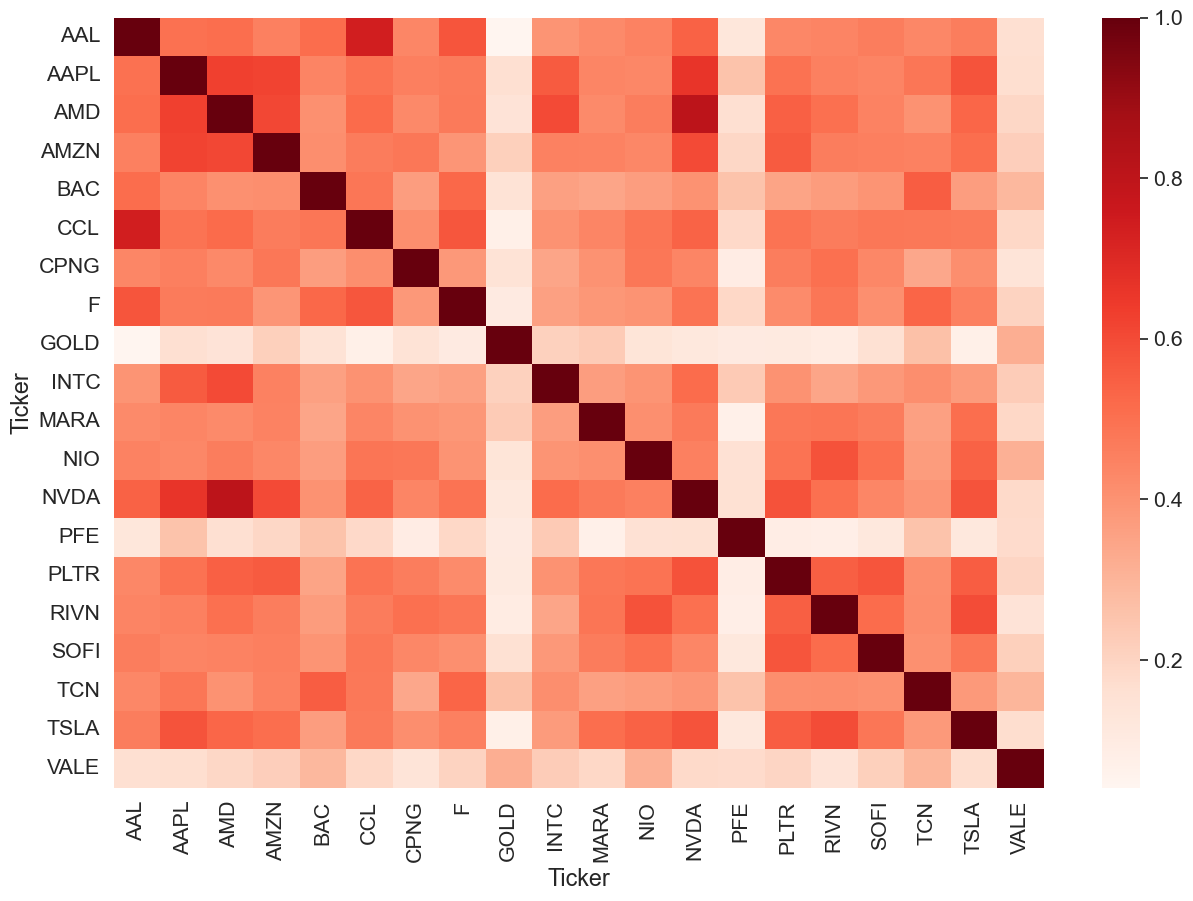

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(ret_challenge.corr(), cmap='Reds', annot_kws={"size":10}, vmax=1)
plt.show()

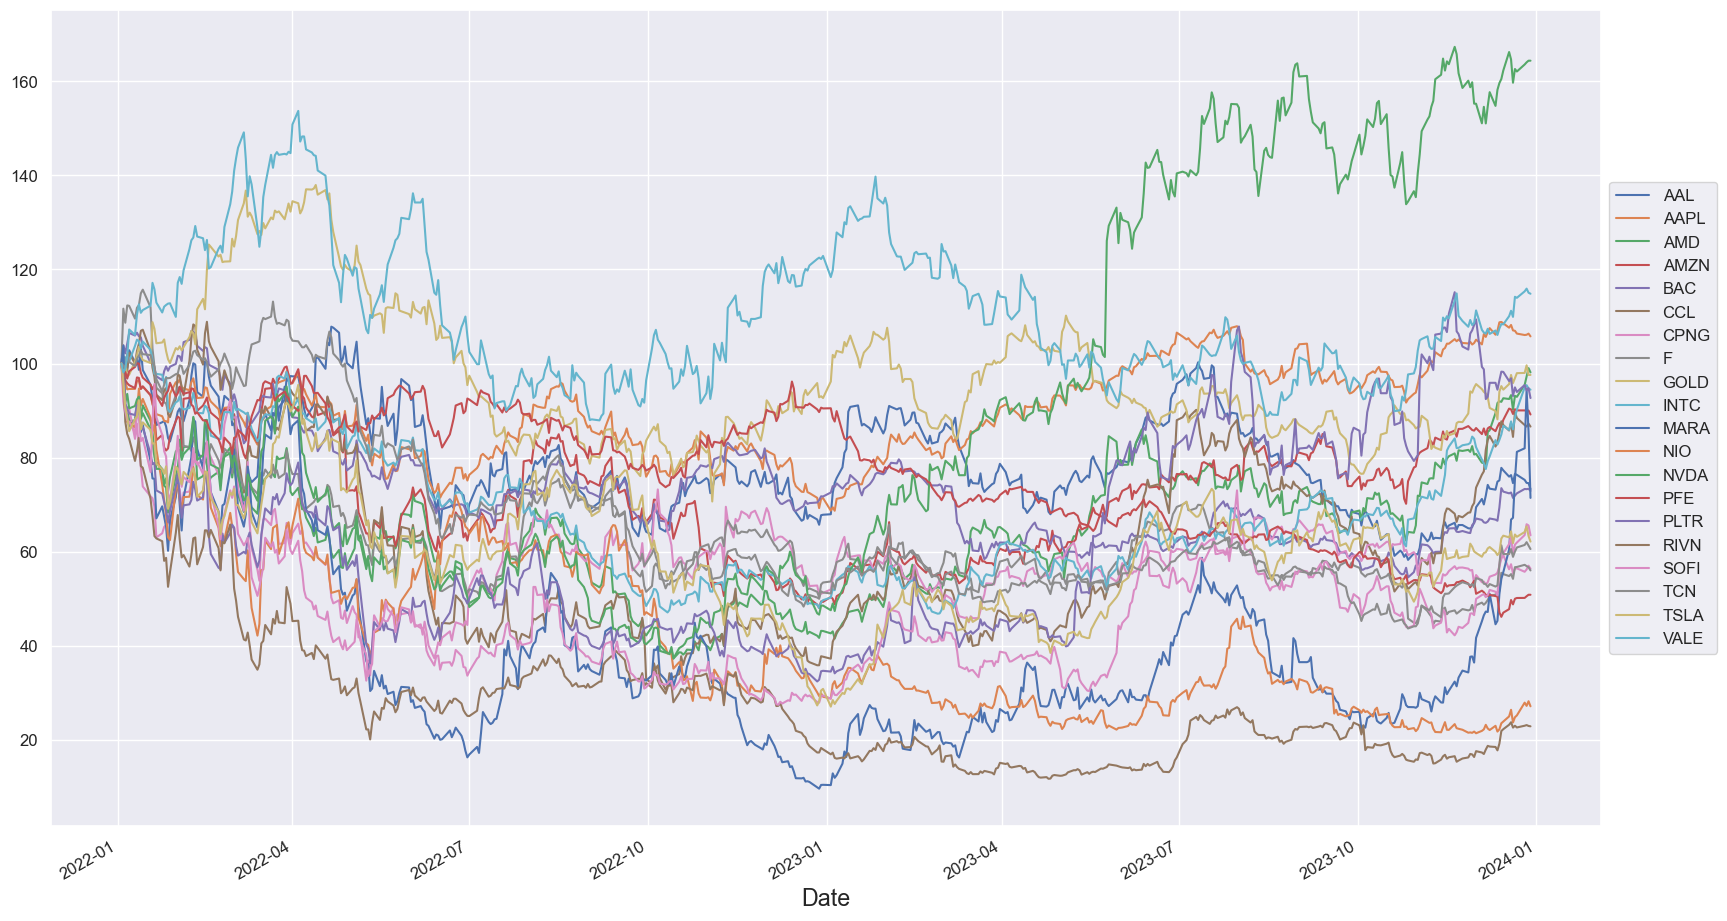

In [67]:
normal_close_challenge.plot(figsize=(20,12), fontsize=12)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.show()

In [75]:
normal_finals = normal_close_challenge.iloc[-1]
normal_finals

Ticker
AAL      73.279999
AAPL    105.779905
AMD      98.116346
AMZN     89.164316
BAC      72.910346
CCL      86.595054
CPNG     56.371870
F        55.994485
GOLD     97.572812
INTC     94.437138
MARA     71.419885
NIO      27.098893
NVDA    164.410217
PFE      50.820830
PLTR     92.660547
RIVN     22.838784
SOFI     63.456630
TCN      60.545579
TSLA     62.131390
VALE    114.844310
Name: 2023-12-29 00:00:00, dtype: float64

In [81]:
normal_finals.nlargest(5)

Ticker
NVDA    164.410217
VALE    114.844310
AAPL    105.779905
AMD      98.116346
GOLD     97.572812
Name: 2023-12-29 00:00:00, dtype: float64

In [82]:
normal_close_challenge.iloc[-1].nlargest(5)

Ticker
NVDA    164.410217
VALE    114.844310
AAPL    105.779905
AMD      98.116346
GOLD     97.572812
Name: 2023-12-29 00:00:00, dtype: float64

In [84]:
import pandas as pd

# Assuming ret_challenge is your DataFrame containing returns data
# Compute the correlation matrix
correlation_matrix = ret_challenge.corr()

# Extract all unique pairs of stocks and their corresponding correlation values
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        stock_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
        correlation_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((stock_pair, correlation_value))

# Sort the correlation pairs by correlation value in ascending order
sorted_correlation_pairs = sorted(correlation_pairs, key=lambda x: x[1])

# Get the 5 least correlated stock pairs
least_correlated_pairs = sorted_correlation_pairs[:5]

# Extract the names of the least correlated stocks
least_correlated_stocks = set()
for pair, correlation_value in least_correlated_pairs:
    least_correlated_stocks.update(pair)

print("5 Least Correlated Stocks:")
print(least_correlated_stocks)


5 Least Correlated Stocks:
{'CCL', 'RIVN', 'MARA', 'GOLD', 'PFE', 'AAL', 'TSLA'}


### My Answer for Best 5 Stocks => MARA, GOLD, NVDA, VALE, and CCL; Choices based on R/R Scatter, Normalized Returns, and Least Correlated

## Simple Returns and Log Returns

In [85]:
df = pd.DataFrame(index=[2016, 2017, 2018], data=[100, 50, 95], columns=['Price'])
df

Price
2016    100
2017     50
2018     95

In [86]:
simple_returns = df.pct_change().dropna()
simple_returns

Price
2017   -0.5
2018    0.9

In [88]:
simple_returns.mean()
# very misleading

Price    0.2
dtype: float64

In [91]:
log_returns = np.log(df/df.shift(1)).dropna()
log_returns

Price
2017 -0.693147
2018  0.641854

In [92]:
log_returns.mean()

Price   -0.025647
dtype: float64

In [93]:
100*np.exp(log_returns.mean()*2)

Price    95.0
dtype: float64

In [94]:
SPY = yf.download("SPY")

[*********************100%%**********************]  1 of 1 completed


In [98]:
spy = SPY.Close.to_frame()
spy

Close
Date                  
1993-01-29   43.937500
1993-02-01   44.250000
1993-02-02   44.343750
1993-02-03   44.812500
1993-02-04   45.000000
...                ...
2024-04-08  518.719971
2024-04-09  519.320007
2024-04-10  514.119995
2024-04-11  518.000000
2024-04-12  510.850006

[7857 rows x 1 columns]

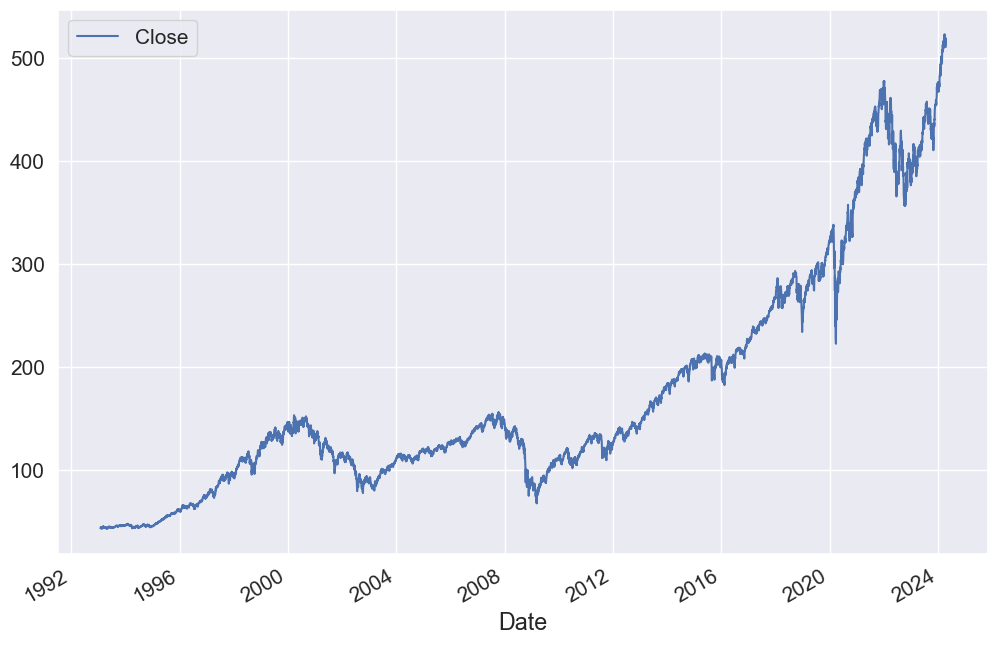

In [100]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [102]:
spy_roll = spy.rolling(window=10)
spy_roll_mean = spy_roll.mean()
spy_roll_median = spy_roll.median()
spy_roll_max = spy_roll.max()
spy_roll_mean

Close
Date                  
1993-01-29         NaN
1993-02-01         NaN
1993-02-02         NaN
1993-02-03         NaN
1993-02-04         NaN
...                ...
2024-04-08  519.544995
2024-04-09  519.499994
2024-04-10  519.030994
2024-04-11  518.513995
2024-04-12  517.291995

[7857 rows x 1 columns]

In [103]:
spy["SMA50"] = spy.rolling(window=50, min_periods=50).mean()
spy

Close     SMA50
Date                            
1993-01-29   43.937500       NaN
1993-02-01   44.250000       NaN
1993-02-02   44.343750       NaN
1993-02-03   44.812500       NaN
1993-02-04   45.000000       NaN
...                ...       ...
2024-04-08  518.719971  507.5442
2024-04-09  519.320007  508.1824
2024-04-10  514.119995  508.6394
2024-04-11  518.000000  509.1816
2024-04-12  510.850006  509.7410

[7857 rows x 2 columns]

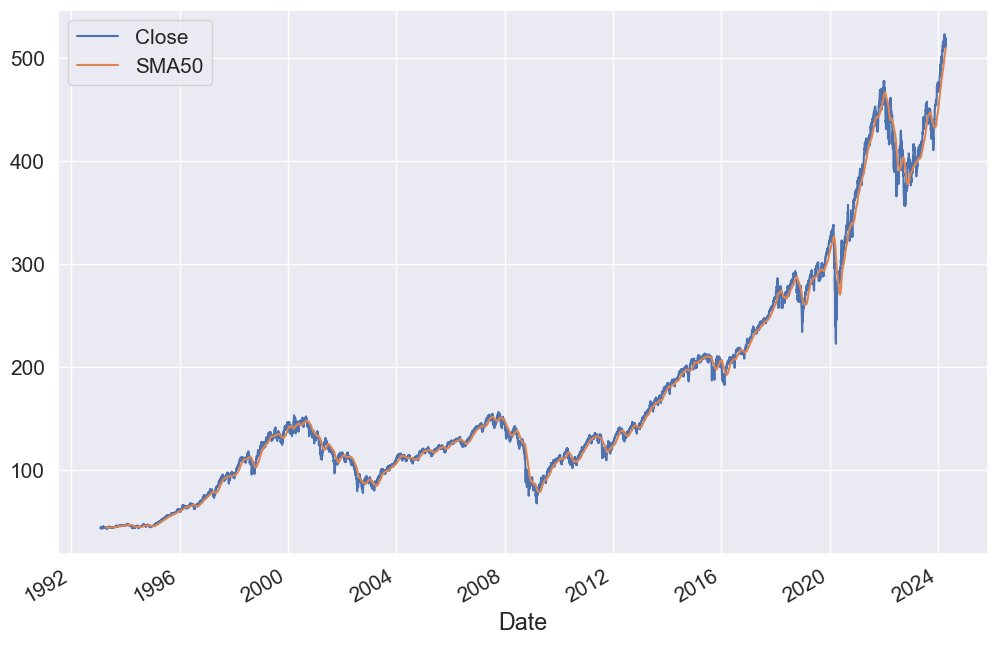

In [104]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

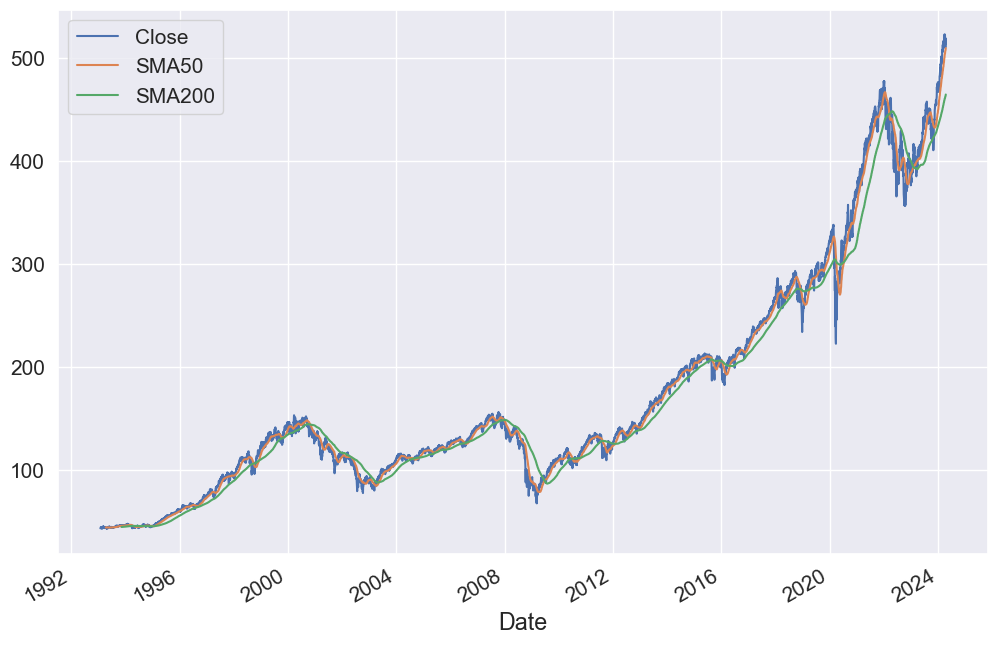

In [105]:
spy["SMA200"] = spy.Close.rolling(window=200, min_periods=200).mean()
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

## Challenge 2: Plot the 5 stocks you picked moving averages as above (MARA, GOLD, NVDA, VALE, CCL)

[*********************100%%**********************]  1 of 1 completed


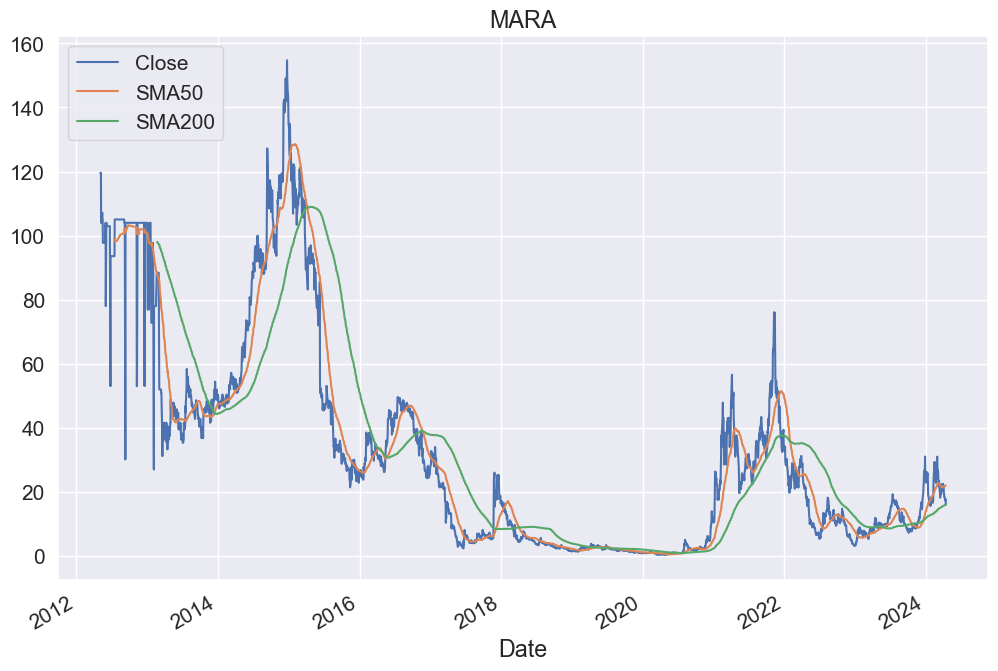

In [107]:
MARA = yf.download("MARA")
mara = MARA.Close.to_frame()
mara["SMA50"] = mara.rolling(window=50, min_periods=50).mean()
mara["SMA200"] = mara.Close.rolling(window=200, min_periods=200).mean()
mara.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.title("MARA")
plt.show()

[*********************100%%**********************]  1 of 1 completed


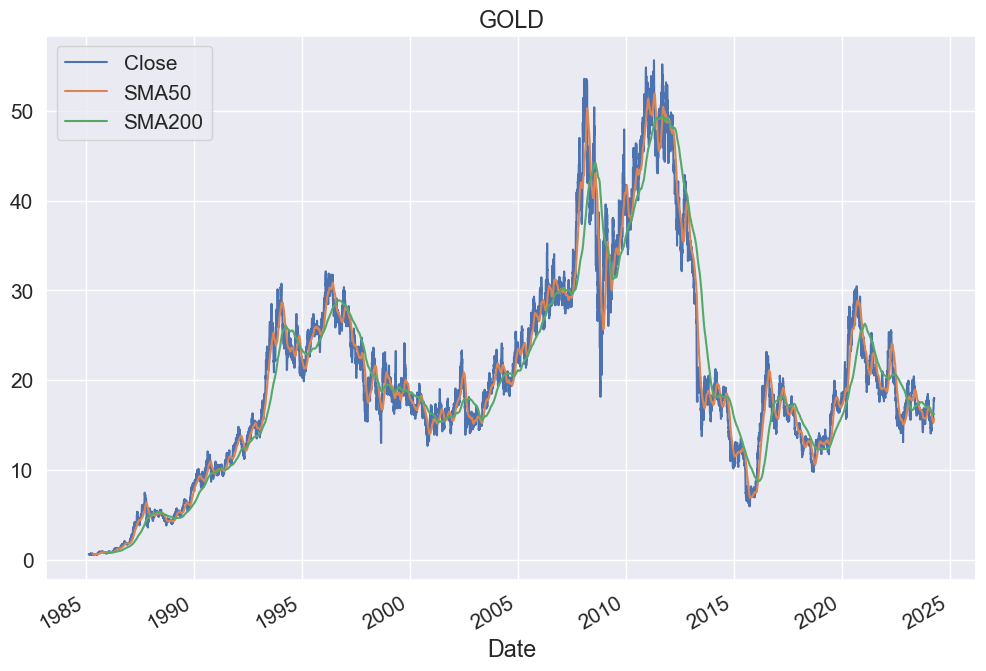

In [109]:
GOLD = yf.download("GOLD")
gold = GOLD.Close.to_frame()
gold["SMA50"] = gold.rolling(window=50, min_periods=50).mean()
gold["SMA200"] = gold.Close.rolling(window=200, min_periods=200).mean()
gold.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.title("GOLD")
plt.show()


[*********************100%%**********************]  1 of 1 completed


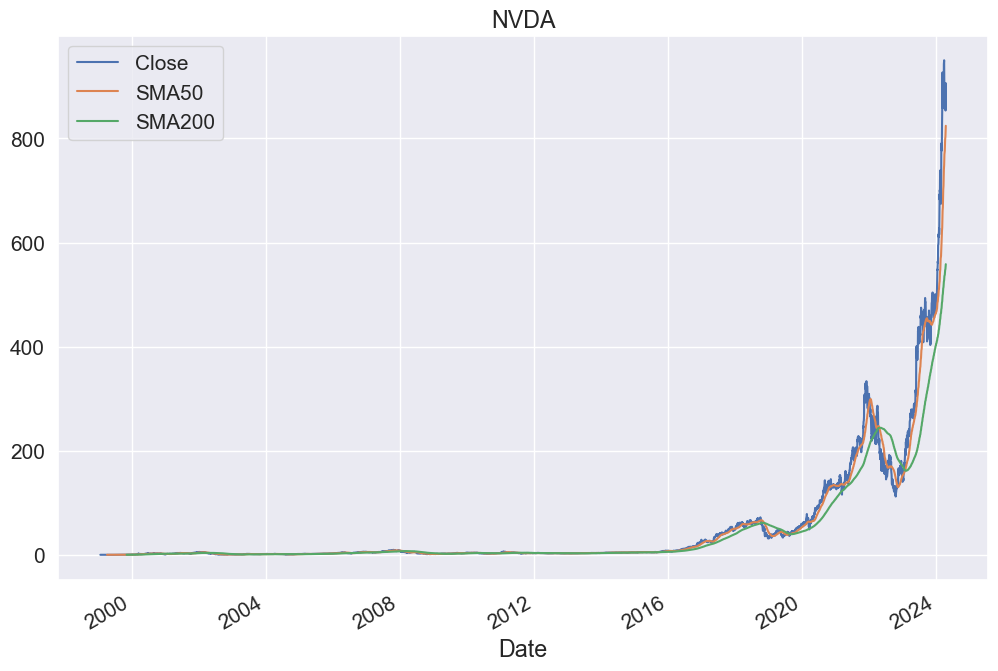

In [110]:
NVDA = yf.download("NVDA")
nvda = NVDA.Close.to_frame()
nvda["SMA50"] = nvda.rolling(window=50, min_periods=50).mean()
nvda["SMA200"] = nvda.Close.rolling(window=200, min_periods=200).mean()
nvda.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.title("NVDA")
plt.show()

[*********************100%%**********************]  1 of 1 completed


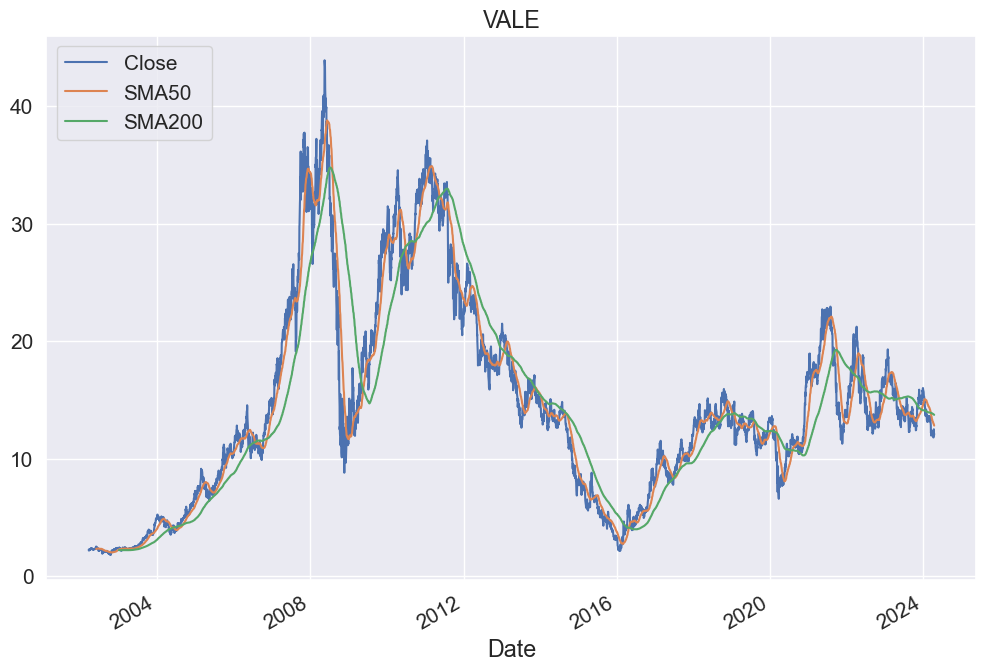

In [111]:
VALE = yf.download("VALE")
vale = VALE.Close.to_frame()
vale["SMA50"] = vale.rolling(window=50, min_periods=50).mean()
vale["SMA200"] = vale.Close.rolling(window=200, min_periods=200).mean()
vale.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.title("VALE")
plt.show()

[*********************100%%**********************]  1 of 1 completed


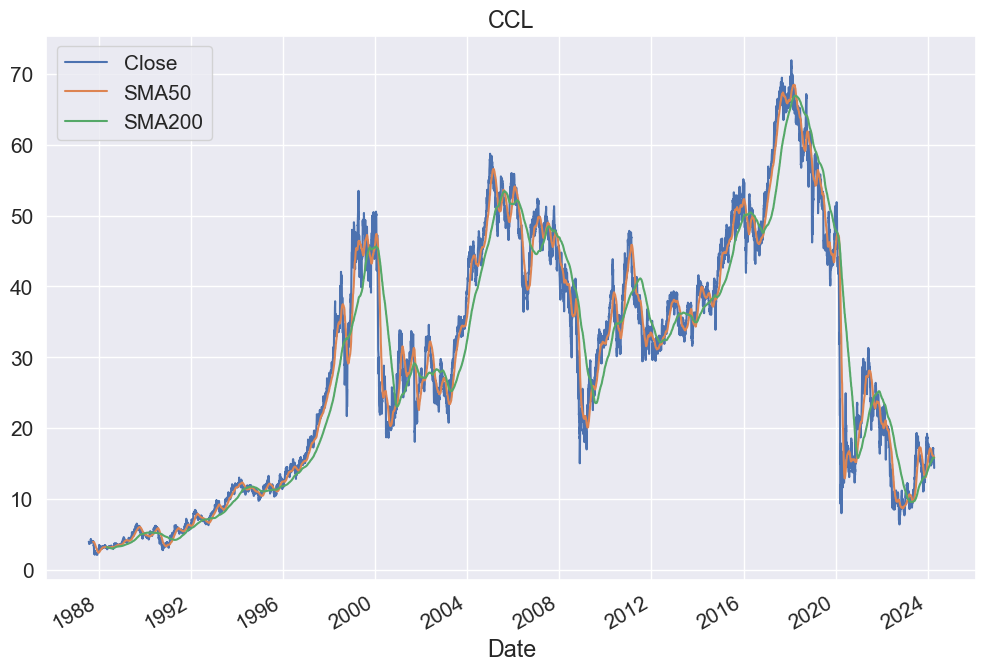

In [112]:
CCL = yf.download("CCL")
ccl = CCL.Close.to_frame()
ccl["SMA50"] = ccl.rolling(window=50, min_periods=50).mean()
ccl["SMA200"] = ccl.Close.rolling(window=200, min_periods=200).mean()
ccl.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.title("CCL")
plt.show()

In [113]:
spy["EMA100"] = spy.Close.ewm(span=100, min_periods=100).mean()
spy

Close     SMA50      SMA200      EMA100
Date                                                    
1993-01-29   43.937500       NaN         NaN         NaN
1993-02-01   44.250000       NaN         NaN         NaN
1993-02-02   44.343750       NaN         NaN         NaN
1993-02-03   44.812500       NaN         NaN         NaN
1993-02-04   45.000000       NaN         NaN         NaN
...                ...       ...         ...         ...
2024-04-08  518.719971  507.5442  463.097951  490.275357
2024-04-09  519.320007  508.1824  463.512001  490.850498
2024-04-10  514.119995  508.6394  463.916551  491.311280
2024-04-11  518.000000  509.1816  464.349351  491.839770
2024-04-12  510.850006  509.7410  464.722751  492.216210

[7857 rows x 4 columns]

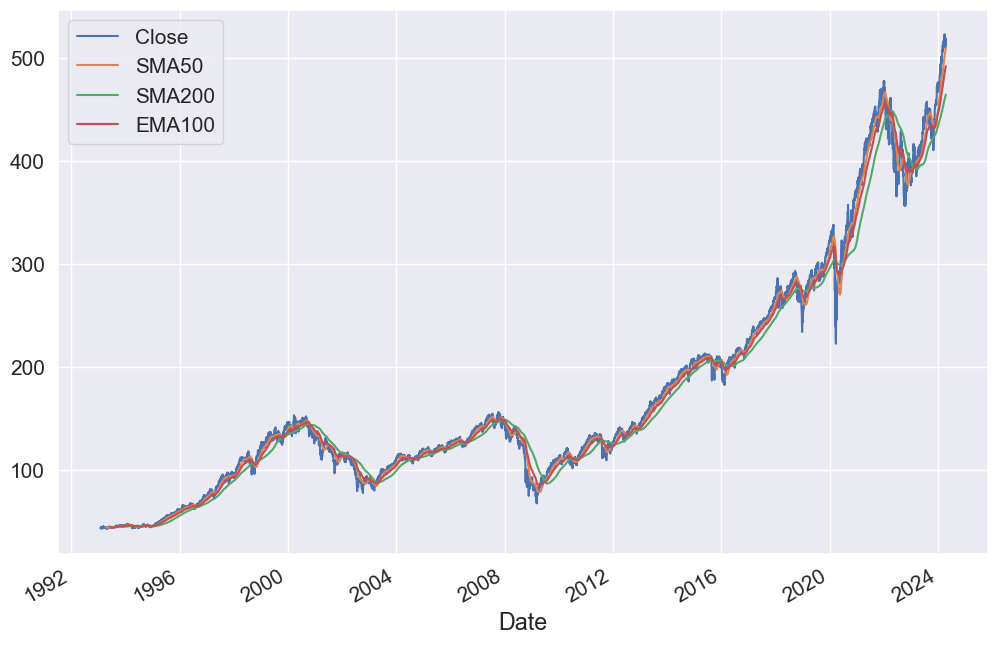

In [114]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [115]:
spy["Day"] = spy.index.day_name()
spy

Close     SMA50      SMA200      EMA100        Day
Date                                                               
1993-01-29   43.937500       NaN         NaN         NaN     Friday
1993-02-01   44.250000       NaN         NaN         NaN     Monday
1993-02-02   44.343750       NaN         NaN         NaN    Tuesday
1993-02-03   44.812500       NaN         NaN         NaN  Wednesday
1993-02-04   45.000000       NaN         NaN         NaN   Thursday
...                ...       ...         ...         ...        ...
2024-04-08  518.719971  507.5442  463.097951  490.275357     Monday
2024-04-09  519.320007  508.1824  463.512001  490.850498    Tuesday
2024-04-10  514.119995  508.6394  463.916551  491.311280  Wednesday
2024-04-11  518.000000  509.1816  464.349351  491.839770   Thursday
2024-04-12  510.850006  509.7410  464.722751  492.216210     Friday

[7857 rows x 5 columns]

In [118]:
spy["Quarter"] = spy.index.quarter
spy

Close     SMA50      SMA200      EMA100        Day  Quarter
Date                                                                        
1993-01-29   43.937500       NaN         NaN         NaN     Friday        1
1993-02-01   44.250000       NaN         NaN         NaN     Monday        1
1993-02-02   44.343750       NaN         NaN         NaN    Tuesday        1
1993-02-03   44.812500       NaN         NaN         NaN  Wednesday        1
1993-02-04   45.000000       NaN         NaN         NaN   Thursday        1
...                ...       ...         ...         ...        ...      ...
2024-04-08  518.719971  507.5442  463.097951  490.275357     Monday        2
2024-04-09  519.320007  508.1824  463.512001  490.850498    Tuesday        2
2024-04-10  514.119995  508.6394  463.916551  491.311280  Wednesday        2
2024-04-11  518.000000  509.1816  464.349351  491.839770   Thursday        2
2024-04-12  510.850006  509.7410  464.722751  492.216210     Friday        2

[7857 rows x 6 columns]

In [124]:
SPY = yf.download("SPY")
spy = SPY.Close.to_frame()
spy

[*********************100%%**********************]  1 of 1 completed


Close
Date                  
1993-01-29   43.937500
1993-02-01   44.250000
1993-02-02   44.343750
1993-02-03   44.812500
1993-02-04   45.000000
...                ...
2024-04-08  518.719971
2024-04-09  519.320007
2024-04-10  514.119995
2024-04-11  518.000000
2024-04-12  510.850006

[7857 rows x 1 columns]

In [122]:
all_days = pd.date_range(start="2010-12-31", end="2020-01-01", freq="D")
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=3289, freq='D')

In [125]:
spy = spy.reindex(all_days)
spy

Close
2010-12-31  125.750000
2011-01-01         NaN
2011-01-02         NaN
2011-01-03  127.050003
2011-01-04  126.980003
...                ...
2019-12-28         NaN
2019-12-29         NaN
2019-12-30  321.079987
2019-12-31  321.859985
2020-01-01         NaN

[3289 rows x 1 columns]

In [129]:
#spy.fillna(method="ffill")
spy.ffill()

Close
2010-12-31  125.750000
2011-01-01  125.750000
2011-01-02  125.750000
2011-01-03  127.050003
2011-01-04  126.980003
...                ...
2019-12-28  322.859985
2019-12-29  322.859985
2019-12-30  321.079987
2019-12-31  321.859985
2020-01-01  321.859985

[3289 rows x 1 columns]

In [128]:
#spy.fillna(method="bfill")
spy.bfill()

Close
2010-12-31  125.750000
2011-01-01  127.050003
2011-01-02  127.050003
2011-01-03  127.050003
2011-01-04  126.980003
...                ...
2019-12-28  321.079987
2019-12-29  321.079987
2019-12-30  321.079987
2019-12-31  321.859985
2020-01-01         NaN

[3289 rows x 1 columns]

In [130]:
SPY = yf.download("SPY", interval='1wk')

[*********************100%%**********************]  1 of 1 completed


In [131]:
SPY

Open        High         Low       Close   Adj Close  \
Date                                                                     
1993-01-25   43.968750   43.968750   43.750000   43.937500   24.763721   
1993-02-01   43.968750   45.093750   43.968750   44.968750   25.344973   
1993-02-08   44.968750   45.125000   44.531250   44.593750   25.133606   
1993-02-15   44.468750   44.468750   42.812500   43.562500   24.552380   
1993-02-22   43.687500   44.437500   43.468750   44.406250   25.027935   
...                ...         ...         ...         ...         ...   
2024-03-11  510.480011  517.380005  508.119995  509.829987  508.250824   
2024-03-18  514.000000  524.109985  511.119995  521.210022  521.210022   
2024-03-25  519.799988  524.609985  518.400024  523.070007  523.070007   
2024-04-01  523.830017  524.380005  512.760010  518.429993  518.429993   
2024-04-08  519.150024  520.750000  509.079987  510.850006  510.850006   

               Volume  
Date                   
1993-01-25    1003200  
1993-02-01    2234800  
1993-02-08    1159800  
1993-02-15     998700  
1993-02-22    1024300  
...               ...  
2024-03-11  408533300  
2024-03-18  358522300  
2024-03-25  293270500  
2024-04-01  367203800  
2024-04-08  448872730  

[1629 rows x 6 columns]

## Cumulative Returns, Drawdowns, etc..

In [132]:
aapl = yf.download("AAPL")

[*********************100%%**********************]  1 of 1 completed


In [137]:
aapl = aapl.Close.to_frame()
aapl

Close
Date                  
1980-12-12    0.128348
1980-12-15    0.121652
1980-12-16    0.112723
1980-12-17    0.115513
1980-12-18    0.118862
...                ...
2024-04-08  168.449997
2024-04-09  169.669998
2024-04-10  167.779999
2024-04-11  175.039993
2024-04-12  176.550003

[10924 rows x 1 columns]

In [138]:
aapl["d_returns"] = np.log(aapl.div(aapl.shift(1)))
aapl

Close  d_returns
Date                             
1980-12-12    0.128348        NaN
1980-12-15    0.121652  -0.053581
1980-12-16    0.112723  -0.076231
1980-12-17    0.115513   0.024450
1980-12-18    0.118862   0.028580
...                ...        ...
2024-04-08  168.449997  -0.006686
2024-04-09  169.669998   0.007216
2024-04-10  167.779999  -0.011202
2024-04-11  175.039993   0.042361
2024-04-12  176.550003   0.008590

[10924 rows x 2 columns]

In [139]:
aapl.dropna(inplace=True)
aapl

Close  d_returns
Date                             
1980-12-15    0.121652  -0.053581
1980-12-16    0.112723  -0.076231
1980-12-17    0.115513   0.024450
1980-12-18    0.118862   0.028580
1980-12-19    0.126116   0.059239
...                ...        ...
2024-04-08  168.449997  -0.006686
2024-04-09  169.669998   0.007216
2024-04-10  167.779999  -0.011202
2024-04-11  175.039993   0.042361
2024-04-12  176.550003   0.008590

[10923 rows x 2 columns]

In [140]:
aapl.d_returns.sum()

7.226614149179675

In [141]:
np.exp(aapl.d_returns.sum())

1375.5571790935214

In [142]:
aapl["cum_returns"] = aapl.d_returns.cumsum().apply(np.exp)
aapl

Close  d_returns  cum_returns
Date                                          
1980-12-15    0.121652  -0.053581     0.947829
1980-12-16    0.112723  -0.076231     0.878261
1980-12-17    0.115513   0.024450     0.899998
1980-12-18    0.118862   0.028580     0.926092
1980-12-19    0.126116   0.059239     0.982610
...                ...        ...          ...
2024-04-08  168.449997  -0.006686  1312.447457
2024-04-09  169.669998   0.007216  1321.952875
2024-04-10  167.779999  -0.011202  1307.227289
2024-04-11  175.039993   0.042361  1363.792213
2024-04-12  176.550003   0.008590  1375.557179

[10923 rows x 3 columns]

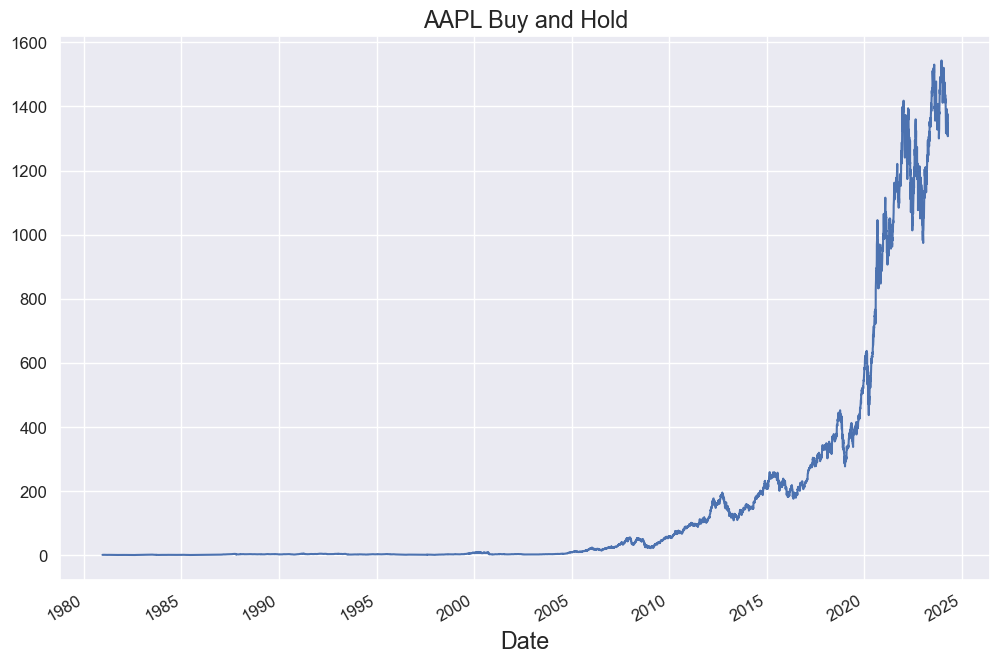

In [143]:
aapl.cum_returns.plot(figsize=(12,8), title="AAPL Buy and Hold", fontsize=12)
plt.show()

In [144]:
aapl.d_returns.mean()*252

0.1667222160206242

In [145]:
aapl.d_returns.std()*np.sqrt(252)

0.4504367204478476

## How to calculate draw downs

In [146]:
aapl["cum_max"] = aapl.cum_returns.cummax()
aapl

Close  d_returns  cum_returns      cum_max
Date                                                       
1980-12-15    0.121652  -0.053581     0.947829     0.947829
1980-12-16    0.112723  -0.076231     0.878261     0.947829
1980-12-17    0.115513   0.024450     0.899998     0.947829
1980-12-18    0.118862   0.028580     0.926092     0.947829
1980-12-19    0.126116   0.059239     0.982610     0.982610
...                ...        ...          ...          ...
2024-04-08  168.449997  -0.006686  1312.447457  1543.537972
2024-04-09  169.669998   0.007216  1321.952875  1543.537972
2024-04-10  167.779999  -0.011202  1307.227289  1543.537972
2024-04-11  175.039993   0.042361  1363.792213  1543.537972
2024-04-12  176.550003   0.008590  1375.557179  1543.537972

[10923 rows x 4 columns]

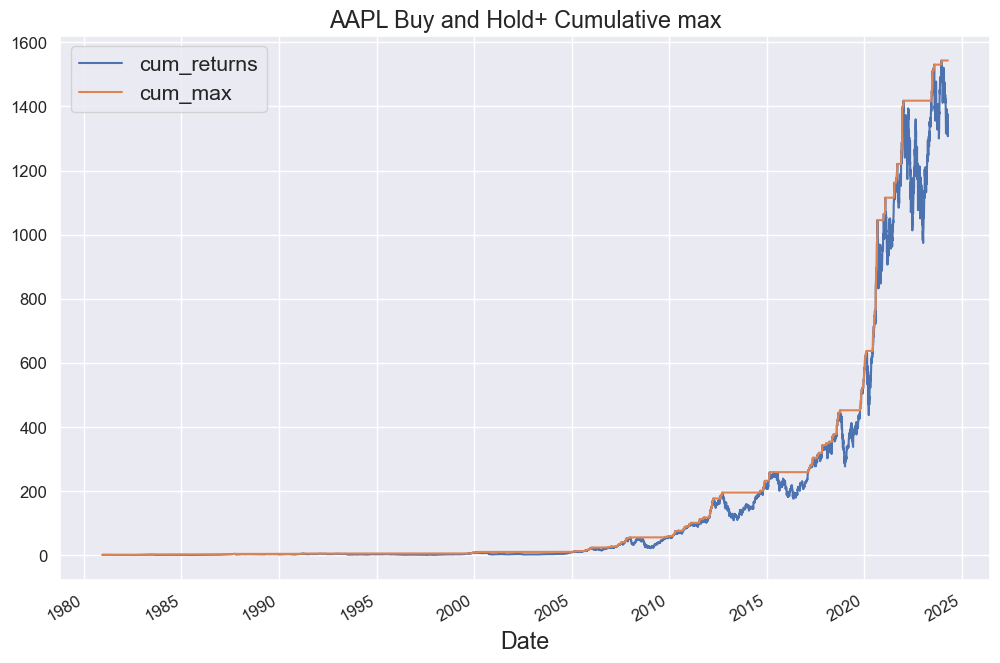

In [147]:
aapl[["cum_returns", "cum_max"]].plot(figsize=(12,8), title="AAPL Buy and Hold+ Cumulative max", fontsize=12)
plt.show()

In [148]:
aapl["drawdown"] = aapl['cum_max'] - aapl['cum_returns']
aapl

Close  d_returns  cum_returns      cum_max    drawdown
Date                                                                   
1980-12-15    0.121652  -0.053581     0.947829     0.947829    0.000000
1980-12-16    0.112723  -0.076231     0.878261     0.947829    0.069569
1980-12-17    0.115513   0.024450     0.899998     0.947829    0.047831
1980-12-18    0.118862   0.028580     0.926092     0.947829    0.021738
1980-12-19    0.126116   0.059239     0.982610     0.982610    0.000000
...                ...        ...          ...          ...         ...
2024-04-08  168.449997  -0.006686  1312.447457  1543.537972  231.090514
2024-04-09  169.669998   0.007216  1321.952875  1543.537972  221.585097
2024-04-10  167.779999  -0.011202  1307.227289  1543.537972  236.310683
2024-04-11  175.039993   0.042361  1363.792213  1543.537972  179.745758
2024-04-12  176.550003   0.008590  1375.557179  1543.537972  167.980792

[10923 rows x 5 columns]

In [149]:
aapl.drawdown.max()

444.02718404402015

In [151]:
aapl.drawdown.idxmax()

Timestamp('2023-01-05 00:00:00')

In [153]:
aapl.loc[(aapl.index<='2023-01-05 00:00:00')]

Close  d_returns  cum_returns      cum_max    drawdown
Date                                                                   
1980-12-15    0.121652  -0.053581     0.947829     0.947829    0.000000
1980-12-16    0.112723  -0.076231     0.878261     0.947829    0.069569
1980-12-17    0.115513   0.024450     0.899998     0.947829    0.047831
1980-12-18    0.118862   0.028580     0.926092     0.947829    0.021738
1980-12-19    0.126116   0.059239     0.982610     0.982610    0.000000
...                ...        ...          ...          ...         ...
2022-12-29  129.610001   0.027931  1009.832703  1418.097708  408.265004
2022-12-30  129.929993   0.002466  1012.325863  1418.097708  405.771845
2023-01-03  125.070000  -0.038122   974.460113  1418.097708  443.637594
2023-01-04  126.360001   0.010261   984.510920  1418.097708  433.586787
2023-01-05  125.019997  -0.010661   974.070524  1418.097708  444.027184

[10605 rows x 5 columns]

In [154]:
aapl["drawdown_pct"] = (aapl['cum_max'] - aapl['cum_returns']) / aapl['cum_max']
aapl

Close  d_returns  cum_returns      cum_max    drawdown  \
Date                                                                      
1980-12-15    0.121652  -0.053581     0.947829     0.947829    0.000000   
1980-12-16    0.112723  -0.076231     0.878261     0.947829    0.069569   
1980-12-17    0.115513   0.024450     0.899998     0.947829    0.047831   
1980-12-18    0.118862   0.028580     0.926092     0.947829    0.021738   
1980-12-19    0.126116   0.059239     0.982610     0.982610    0.000000   
...                ...        ...          ...          ...         ...   
2024-04-08  168.449997  -0.006686  1312.447457  1543.537972  231.090514   
2024-04-09  169.669998   0.007216  1321.952875  1543.537972  221.585097   
2024-04-10  167.779999  -0.011202  1307.227289  1543.537972  236.310683   
2024-04-11  175.039993   0.042361  1363.792213  1543.537972  179.745758   
2024-04-12  176.550003   0.008590  1375.557179  1543.537972  167.980792   

            drawdown_pct  
Date                      
1980-12-15      0.000000  
1980-12-16      0.073398  
1980-12-17      0.050464  
1980-12-18      0.022934  
1980-12-19      0.000000  
...                  ...  
2024-04-08      0.149715  
2024-04-09      0.143557  
2024-04-10      0.153097  
2024-04-11      0.116450  
2024-04-12      0.108828  

[10923 rows x 6 columns]

In [155]:
aapl.drawdown_pct.max()

0.82216567924191

In [157]:
aapl["drawdown_pct"].idxmax()

Timestamp('1997-12-23 00:00:00')

In [158]:
aapl.loc[(aapl.index<='1997-12-23 00:00:00')]

Close  d_returns  cum_returns   cum_max  drawdown  drawdown_pct
Date                                                                          
1980-12-15  0.121652  -0.053581     0.947829  0.947829  0.000000      0.000000
1980-12-16  0.112723  -0.076231     0.878261  0.947829  0.069569      0.073398
1980-12-17  0.115513   0.024450     0.899998  0.947829  0.047831      0.050464
1980-12-18  0.118862   0.028580     0.926092  0.947829  0.021738      0.022934
1980-12-19  0.126116   0.059239     0.982610  0.982610  0.000000      0.000000
...              ...        ...          ...       ...       ...           ...
1997-12-17  0.124442  -0.026549     0.969567  5.060882  4.091315      0.808419
1997-12-18  0.123326  -0.009008     0.960872  5.060882  4.100010      0.810137
1997-12-19  0.122210  -0.009090     0.952177  5.060882  4.108705      0.811856
1997-12-22  0.118862  -0.027778     0.926092  5.060882  4.134790      0.817010
1997-12-23  0.115513  -0.028580     0.899998  5.060882  4.160883      0.822166

[4306 rows x 6 columns]

## SMA Strategy

In [163]:
data = aapl.Close.loc[(aapl.index >='1991-01-01')].to_frame()
data

Close
Date                  
1991-01-02    0.388393
1991-01-03    0.383929
1991-01-04    0.386161
1991-01-07    0.386161
1991-01-08    0.386161
...                ...
2024-04-08  168.449997
2024-04-09  169.669998
2024-04-10  167.779999
2024-04-11  175.039993
2024-04-12  176.550003

[8383 rows x 1 columns]

In [164]:
sma_s=50
sma_l=100

In [165]:
data["sma_s"] = data.Close.rolling(window=sma_s).mean()
data["sma_l"] = data.Close.rolling(window=sma_l).mean()

In [166]:
data

Close    sma_s     sma_l
Date                                     
1991-01-02    0.388393      NaN       NaN
1991-01-03    0.383929      NaN       NaN
1991-01-04    0.386161      NaN       NaN
1991-01-07    0.386161      NaN       NaN
1991-01-08    0.386161      NaN       NaN
...                ...      ...       ...
2024-04-08  168.449997  178.428  184.5572
2024-04-09  169.669998  177.973  184.4059
2024-04-10  167.779999  177.494  184.2093
2024-04-11  175.039993  177.234  184.0796
2024-04-12  176.550003  177.077  183.9480

[8383 rows x 3 columns]

<Axes: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

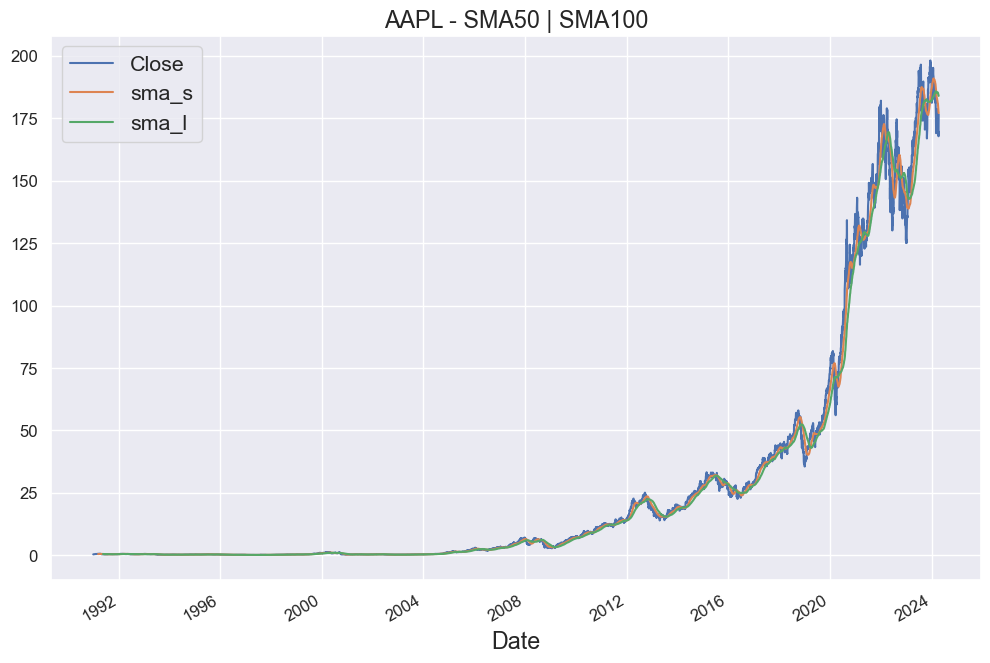

In [167]:
data.plot(figsize=(12,8), title=f"AAPL - SMA{sma_s} | SMA{sma_l}", fontsize=12)

<Axes: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

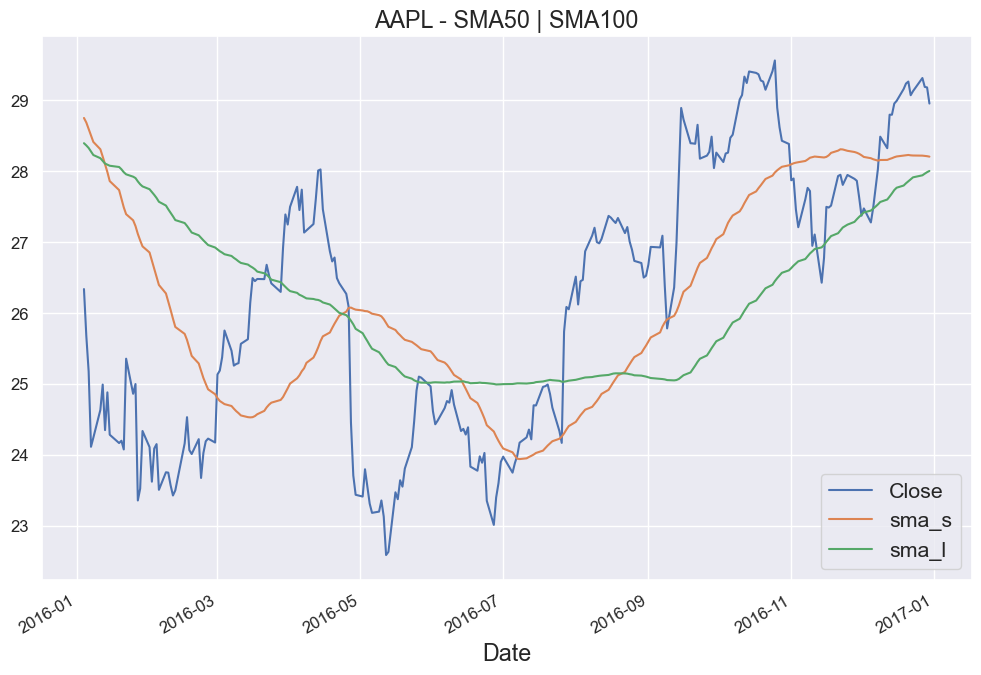

In [168]:
data.loc['2016'].plot(figsize=(12,8), title=f"AAPL - SMA{sma_s} | SMA{sma_l}", fontsize=12)

In [169]:
data.dropna(inplace=True)
data

Close       sma_s       sma_l
Date                                          
1991-05-23    0.402902    0.534420    0.513326
1991-05-24    0.409598    0.530960    0.513538
1991-05-28    0.410714    0.527344    0.513806
1991-05-29    0.419643    0.523638    0.514141
1991-05-30    0.425223    0.519732    0.514531
...                ...         ...         ...
2024-04-08  168.449997  178.428000  184.557200
2024-04-09  169.669998  177.973000  184.405900
2024-04-10  167.779999  177.494000  184.209300
2024-04-11  175.039993  177.234000  184.079600
2024-04-12  176.550003  177.077000  183.948000

[8284 rows x 3 columns]

In [170]:
data["position"] = np.where(data['sma_s']>data["sma_l"], 1, -1)
data

Close       sma_s       sma_l  position
Date                                                    
1991-05-23    0.402902    0.534420    0.513326         1
1991-05-24    0.409598    0.530960    0.513538         1
1991-05-28    0.410714    0.527344    0.513806         1
1991-05-29    0.419643    0.523638    0.514141         1
1991-05-30    0.425223    0.519732    0.514531         1
...                ...         ...         ...       ...
2024-04-08  168.449997  178.428000  184.557200        -1
2024-04-09  169.669998  177.973000  184.405900        -1
2024-04-10  167.779999  177.494000  184.209300        -1
2024-04-11  175.039993  177.234000  184.079600        -1
2024-04-12  176.550003  177.077000  183.948000        -1

[8284 rows x 4 columns]

<Axes: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

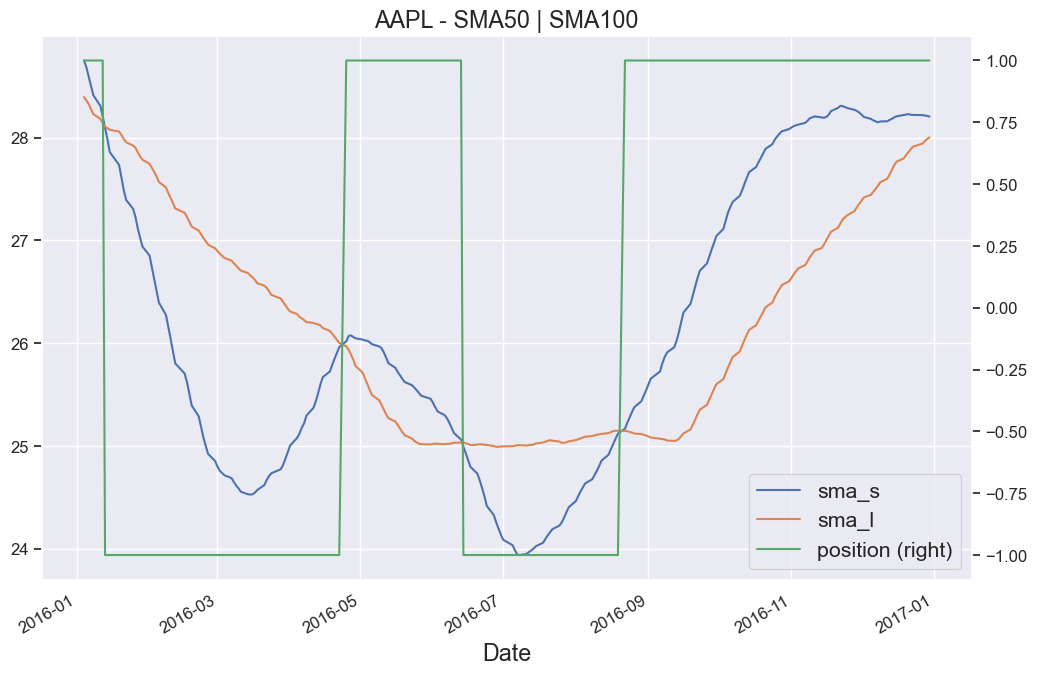

In [173]:
data.loc["2016", ['sma_s', 'sma_l', 'position']].plot(figsize=(12,8), title=f"AAPL - SMA{sma_s} | SMA{sma_l}", fontsize=12, secondary_y="position")

In [174]:
data["returns_bh"] = np.log(data.Close.div(data.Close.shift(1)))
data

Close       sma_s       sma_l  position  returns_bh
Date                                                                
1991-05-23    0.402902    0.534420    0.513326         1         NaN
1991-05-24    0.409598    0.530960    0.513538         1    0.016483
1991-05-28    0.410714    0.527344    0.513806         1    0.002721
1991-05-29    0.419643    0.523638    0.514141         1    0.021507
1991-05-30    0.425223    0.519732    0.514531         1    0.013209
...                ...         ...         ...       ...         ...
2024-04-08  168.449997  178.428000  184.557200        -1   -0.006686
2024-04-09  169.669998  177.973000  184.405900        -1    0.007216
2024-04-10  167.779999  177.494000  184.209300        -1   -0.011202
2024-04-11  175.039993  177.234000  184.079600        -1    0.042361
2024-04-12  176.550003  177.077000  183.948000        -1    0.008590

[8284 rows x 5 columns]

In [175]:
data["strategy"] = data["returns_bh"]*data.position.shift(1)
data

Close       sma_s       sma_l  position  returns_bh  strategy
Date                                                                          
1991-05-23    0.402902    0.534420    0.513326         1         NaN       NaN
1991-05-24    0.409598    0.530960    0.513538         1    0.016483  0.016483
1991-05-28    0.410714    0.527344    0.513806         1    0.002721  0.002721
1991-05-29    0.419643    0.523638    0.514141         1    0.021507  0.021507
1991-05-30    0.425223    0.519732    0.514531         1    0.013209  0.013209
...                ...         ...         ...       ...         ...       ...
2024-04-08  168.449997  178.428000  184.557200        -1   -0.006686  0.006686
2024-04-09  169.669998  177.973000  184.405900        -1    0.007216 -0.007216
2024-04-10  167.779999  177.494000  184.209300        -1   -0.011202  0.011202
2024-04-11  175.039993  177.234000  184.079600        -1    0.042361 -0.042361
2024-04-12  176.550003  177.077000  183.948000        -1    0.008590 -0.008590

[8284 rows x 6 columns]

In [176]:
data.dropna(inplace=True)
data

Close       sma_s       sma_l  position  returns_bh  strategy
Date                                                                          
1991-05-24    0.409598    0.530960    0.513538         1    0.016483  0.016483
1991-05-28    0.410714    0.527344    0.513806         1    0.002721  0.002721
1991-05-29    0.419643    0.523638    0.514141         1    0.021507  0.021507
1991-05-30    0.425223    0.519732    0.514531         1    0.013209  0.013209
1991-05-31    0.419643    0.516027    0.514866         1   -0.013209 -0.013209
...                ...         ...         ...       ...         ...       ...
2024-04-08  168.449997  178.428000  184.557200        -1   -0.006686  0.006686
2024-04-09  169.669998  177.973000  184.405900        -1    0.007216 -0.007216
2024-04-10  167.779999  177.494000  184.209300        -1   -0.011202  0.011202
2024-04-11  175.039993  177.234000  184.079600        -1    0.042361 -0.042361
2024-04-12  176.550003  177.077000  183.948000        -1    0.008590 -0.008590

[8283 rows x 6 columns]

In [177]:
data[["returns_bh", "strategy"]].sum() 

returns_bh    6.082666
strategy      1.806318
dtype: float64

In [178]:
data[["returns_bh", "strategy"]].sum().apply(np.exp) # what $1 will be

returns_bh    438.195889
strategy        6.087993
dtype: float64

In [179]:
data[["returns_bh", "strategy"]].std()*np.sqrt(252) # annual stdev

returns_bh    0.433527
strategy      0.433670
dtype: float64

<Axes: xlabel='Date'>

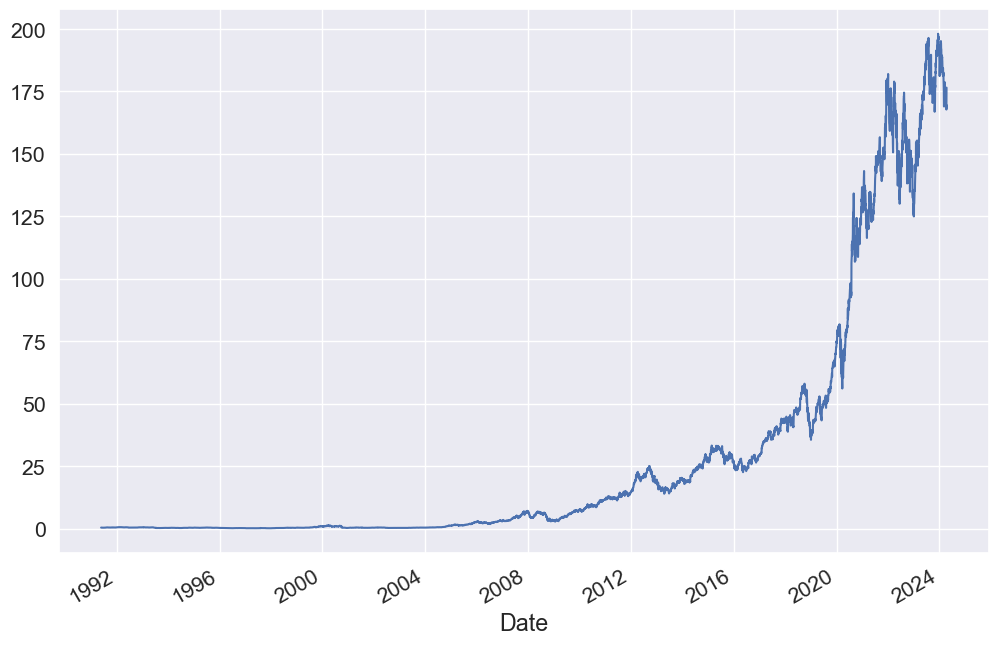

In [180]:
data.Close.plot(figsize=(12,8))

## Strategy adjusted with long bias

In [181]:
data["position_2"] = np.where(data['sma_s']>data["sma_l"], 1, 0)
data

Close       sma_s       sma_l  position  returns_bh  \
Date                                                                   
1991-05-24    0.409598    0.530960    0.513538         1    0.016483   
1991-05-28    0.410714    0.527344    0.513806         1    0.002721   
1991-05-29    0.419643    0.523638    0.514141         1    0.021507   
1991-05-30    0.425223    0.519732    0.514531         1    0.013209   
1991-05-31    0.419643    0.516027    0.514866         1   -0.013209   
...                ...         ...         ...       ...         ...   
2024-04-08  168.449997  178.428000  184.557200        -1   -0.006686   
2024-04-09  169.669998  177.973000  184.405900        -1    0.007216   
2024-04-10  167.779999  177.494000  184.209300        -1   -0.011202   
2024-04-11  175.039993  177.234000  184.079600        -1    0.042361   
2024-04-12  176.550003  177.077000  183.948000        -1    0.008590   

            strategy  position_2  
Date                              
1991-05-24  0.016483           1  
1991-05-28  0.002721           1  
1991-05-29  0.021507           1  
1991-05-30  0.013209           1  
1991-05-31 -0.013209           1  
...              ...         ...  
2024-04-08  0.006686           0  
2024-04-09 -0.007216           0  
2024-04-10  0.011202           0  
2024-04-11 -0.042361           0  
2024-04-12 -0.008590           0  

[8283 rows x 7 columns]

In [182]:
data["strategy_2"] = data["returns_bh"]*data.position_2.shift(1)
data

Close       sma_s       sma_l  position  returns_bh  \
Date                                                                   
1991-05-24    0.409598    0.530960    0.513538         1    0.016483   
1991-05-28    0.410714    0.527344    0.513806         1    0.002721   
1991-05-29    0.419643    0.523638    0.514141         1    0.021507   
1991-05-30    0.425223    0.519732    0.514531         1    0.013209   
1991-05-31    0.419643    0.516027    0.514866         1   -0.013209   
...                ...         ...         ...       ...         ...   
2024-04-08  168.449997  178.428000  184.557200        -1   -0.006686   
2024-04-09  169.669998  177.973000  184.405900        -1    0.007216   
2024-04-10  167.779999  177.494000  184.209300        -1   -0.011202   
2024-04-11  175.039993  177.234000  184.079600        -1    0.042361   
2024-04-12  176.550003  177.077000  183.948000        -1    0.008590   

            strategy  position_2  strategy_2  
Date                                          
1991-05-24  0.016483           1         NaN  
1991-05-28  0.002721           1    0.002721  
1991-05-29  0.021507           1    0.021507  
1991-05-30  0.013209           1    0.013209  
1991-05-31 -0.013209           1   -0.013209  
...              ...         ...         ...  
2024-04-08  0.006686           0   -0.000000  
2024-04-09 -0.007216           0    0.000000  
2024-04-10  0.011202           0   -0.000000  
2024-04-11 -0.042361           0    0.000000  
2024-04-12 -0.008590           0    0.000000  

[8283 rows x 8 columns]

In [183]:
data.dropna(inplace=True)
data

Close       sma_s       sma_l  position  returns_bh  \
Date                                                                   
1991-05-28    0.410714    0.527344    0.513806         1    0.002721   
1991-05-29    0.419643    0.523638    0.514141         1    0.021507   
1991-05-30    0.425223    0.519732    0.514531         1    0.013209   
1991-05-31    0.419643    0.516027    0.514866         1   -0.013209   
1991-06-03    0.439732    0.513259    0.515223        -1    0.046761   
...                ...         ...         ...       ...         ...   
2024-04-08  168.449997  178.428000  184.557200        -1   -0.006686   
2024-04-09  169.669998  177.973000  184.405900        -1    0.007216   
2024-04-10  167.779999  177.494000  184.209300        -1   -0.011202   
2024-04-11  175.039993  177.234000  184.079600        -1    0.042361   
2024-04-12  176.550003  177.077000  183.948000        -1    0.008590   

            strategy  position_2  strategy_2  
Date                                          
1991-05-28  0.002721           1    0.002721  
1991-05-29  0.021507           1    0.021507  
1991-05-30  0.013209           1    0.013209  
1991-05-31 -0.013209           1   -0.013209  
1991-06-03  0.046761           0    0.046761  
...              ...         ...         ...  
2024-04-08  0.006686           0   -0.000000  
2024-04-09 -0.007216           0    0.000000  
2024-04-10  0.011202           0   -0.000000  
2024-04-11 -0.042361           0    0.000000  
2024-04-12 -0.008590           0    0.000000  

[8282 rows x 8 columns]

In [184]:
data[["returns_bh", "strategy", "strategy_2"]].sum() 

returns_bh    6.066183
strategy      1.789836
strategy_2    3.928009
dtype: float64

In [185]:
data[["returns_bh", "strategy", "strategy_2"]].sum().apply(np.exp) # what $1 will be

returns_bh    431.032393
strategy        5.988468
strategy_2     50.805744
dtype: float64

In [186]:
data[["returns_bh", "strategy", "strategy_2"]].std()*np.sqrt(252) # annual stdev

returns_bh    0.433544
strategy      0.433687
strategy_2    0.335115
dtype: float64

## Strategy 2 is better than Strategy 1

In [187]:
data[["strategy", "strategy_2"]].std()*np.sqrt(252) # annual stdev

strategy      0.433687
strategy_2    0.335115
dtype: float64

## Challenge 3
### Find the best SMA for the top 5 stocks (MARA, GOLD, NVDA, VALE, CCL)
### create a bias strategy
### compare drawdowns
### pick 3 best stocks for your portfolio

## MARA

In [188]:
# run for MARA, GOLD, NVDA, VALE and CCL
mara = yf.download("MARA")
mara = mara.Close.to_frame()
data_mara = mara.Close.loc[(mara.index >='1991-01-01')].to_frame()
data_mara

[*********************100%%**********************]  1 of 1 completed


Close
Date                  
2012-05-04  119.599998
2012-05-07  119.599998
2012-05-08  104.000000
2012-05-09  104.000000
2012-05-10  104.000000
...                ...
2024-04-08   17.950001
2024-04-09   17.980000
2024-04-10   17.379999
2024-04-11   17.600000
2024-04-12   16.110001

[3004 rows x 1 columns]

In [190]:
sma_s=50
sma_l=100

data_mara["sma_s"] = data_mara.Close.rolling(window=sma_s).mean()
data_mara["sma_l"] = data_mara.Close.rolling(window=sma_l).mean()
data_mara

Close    sma_s    sma_l
Date                                    
2012-05-04  119.599998      NaN      NaN
2012-05-07  119.599998      NaN      NaN
2012-05-08  104.000000      NaN      NaN
2012-05-09  104.000000      NaN      NaN
2012-05-10  104.000000      NaN      NaN
...                ...      ...      ...
2024-04-08   17.950001  22.0172  19.8703
2024-04-09   17.980000  22.0198  19.9583
2024-04-10   17.379999  21.9970  20.0404
2024-04-11   17.600000  21.9868  20.1140
2024-04-12   16.110001  21.9544  20.1775

[3004 rows x 3 columns]

<Axes: title={'center': 'MARA - SMA50 | SMA100'}, xlabel='Date'>

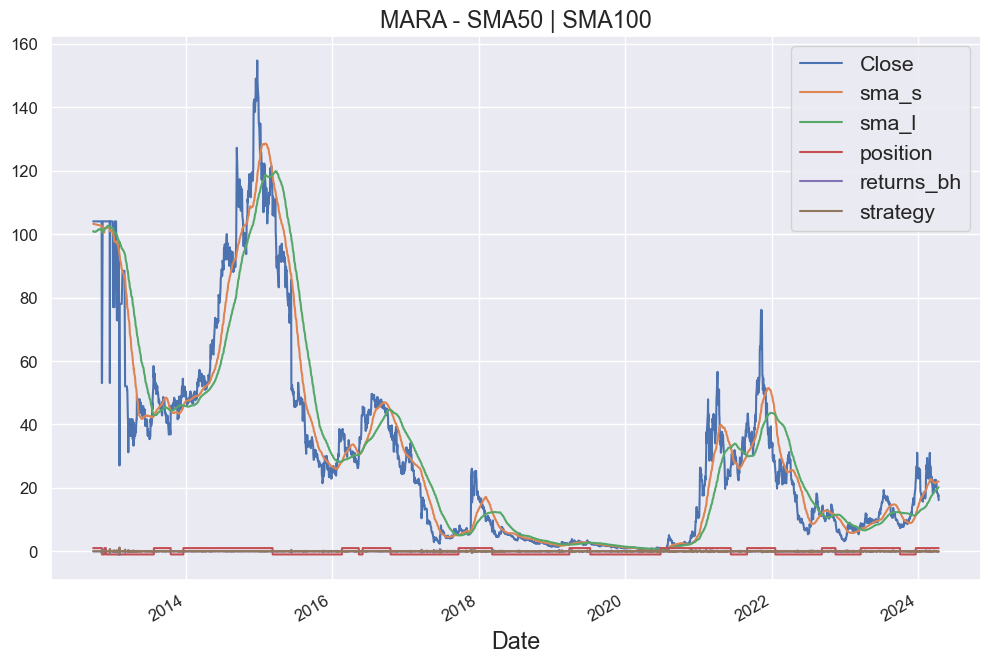

In [202]:
data_mara.plot(figsize=(12,8), title=f"MARA - SMA{sma_s} | SMA{sma_l}", fontsize=12)

In [192]:
data_mara.dropna(inplace=True)
data_mara

Close       sma_s     sma_l
Date                                        
2012-09-25  104.000000  103.251201  101.0672
2012-09-26  104.000000  103.230401  100.9112
2012-09-27  104.000000  103.209601  100.7552
2012-09-28  104.000000  103.188801  100.7552
2012-10-01  104.000000  103.168001  100.7552
...                ...         ...       ...
2024-04-08   17.950001   22.017200   19.8703
2024-04-09   17.980000   22.019800   19.9583
2024-04-10   17.379999   21.997000   20.0404
2024-04-11   17.600000   21.986800   20.1140
2024-04-12   16.110001   21.954400   20.1775

[2905 rows x 3 columns]

In [193]:
data_mara["position"] = np.where(data_mara['sma_s']>data_mara["sma_l"], 1, -1)
data_mara

Close       sma_s     sma_l  position
Date                                                  
2012-09-25  104.000000  103.251201  101.0672         1
2012-09-26  104.000000  103.230401  100.9112         1
2012-09-27  104.000000  103.209601  100.7552         1
2012-09-28  104.000000  103.188801  100.7552         1
2012-10-01  104.000000  103.168001  100.7552         1
...                ...         ...       ...       ...
2024-04-08   17.950001   22.017200   19.8703         1
2024-04-09   17.980000   22.019800   19.9583         1
2024-04-10   17.379999   21.997000   20.0404         1
2024-04-11   17.600000   21.986800   20.1140         1
2024-04-12   16.110001   21.954400   20.1775         1

[2905 rows x 4 columns]

In [194]:
data_mara["returns_bh"] = np.log(data_mara.Close.div(data_mara.Close.shift(1)))
data_mara

Close       sma_s     sma_l  position  returns_bh
Date                                                              
2012-09-25  104.000000  103.251201  101.0672         1         NaN
2012-09-26  104.000000  103.230401  100.9112         1    0.000000
2012-09-27  104.000000  103.209601  100.7552         1    0.000000
2012-09-28  104.000000  103.188801  100.7552         1    0.000000
2012-10-01  104.000000  103.168001  100.7552         1    0.000000
...                ...         ...       ...       ...         ...
2024-04-08   17.950001   22.017200   19.8703         1   -0.026390
2024-04-09   17.980000   22.019800   19.9583         1    0.001670
2024-04-10   17.379999   21.997000   20.0404         1   -0.033940
2024-04-11   17.600000   21.986800   20.1140         1    0.012579
2024-04-12   16.110001   21.954400   20.1775         1   -0.088459

[2905 rows x 5 columns]

In [195]:
data_mara["strategy"] = data_mara["returns_bh"]*data_mara.position.shift(1)
data_mara

Close       sma_s     sma_l  position  returns_bh  strategy
Date                                                                        
2012-09-25  104.000000  103.251201  101.0672         1         NaN       NaN
2012-09-26  104.000000  103.230401  100.9112         1    0.000000  0.000000
2012-09-27  104.000000  103.209601  100.7552         1    0.000000  0.000000
2012-09-28  104.000000  103.188801  100.7552         1    0.000000  0.000000
2012-10-01  104.000000  103.168001  100.7552         1    0.000000  0.000000
...                ...         ...       ...       ...         ...       ...
2024-04-08   17.950001   22.017200   19.8703         1   -0.026390 -0.026390
2024-04-09   17.980000   22.019800   19.9583         1    0.001670  0.001670
2024-04-10   17.379999   21.997000   20.0404         1   -0.033940 -0.033940
2024-04-11   17.600000   21.986800   20.1140         1    0.012579  0.012579
2024-04-12   16.110001   21.954400   20.1775         1   -0.088459 -0.088459

[2905 rows x 6 columns]

In [196]:
data_mara.dropna(inplace=True)
data_mara

Close       sma_s     sma_l  position  returns_bh  strategy
Date                                                                        
2012-09-26  104.000000  103.230401  100.9112         1    0.000000  0.000000
2012-09-27  104.000000  103.209601  100.7552         1    0.000000  0.000000
2012-09-28  104.000000  103.188801  100.7552         1    0.000000  0.000000
2012-10-01  104.000000  103.168001  100.7552         1    0.000000  0.000000
2012-10-02  104.000000  103.147201  100.7552         1    0.000000  0.000000
...                ...         ...       ...       ...         ...       ...
2024-04-08   17.950001   22.017200   19.8703         1   -0.026390 -0.026390
2024-04-09   17.980000   22.019800   19.9583         1    0.001670  0.001670
2024-04-10   17.379999   21.997000   20.0404         1   -0.033940 -0.033940
2024-04-11   17.600000   21.986800   20.1140         1    0.012579  0.012579
2024-04-12   16.110001   21.954400   20.1775         1   -0.088459 -0.088459

[2904 rows x 6 columns]

In [204]:
data_mara[["returns_bh", "strategy"]].sum() 

returns_bh   -1.864951
strategy      5.051974
dtype: float64

In [199]:
data_mara[["returns_bh", "strategy"]].sum().apply(np.exp) # what $1 will be

returns_bh      0.154904
strategy      156.330824
dtype: float64

In [203]:
data_mara[["returns_bh", "strategy"]].std()*np.sqrt(252) # annual stdev

returns_bh    1.387952
strategy      1.387715
dtype: float64

<Axes: title={'center': 'MARA - SMA50 | SMA100'}, xlabel='Date'>

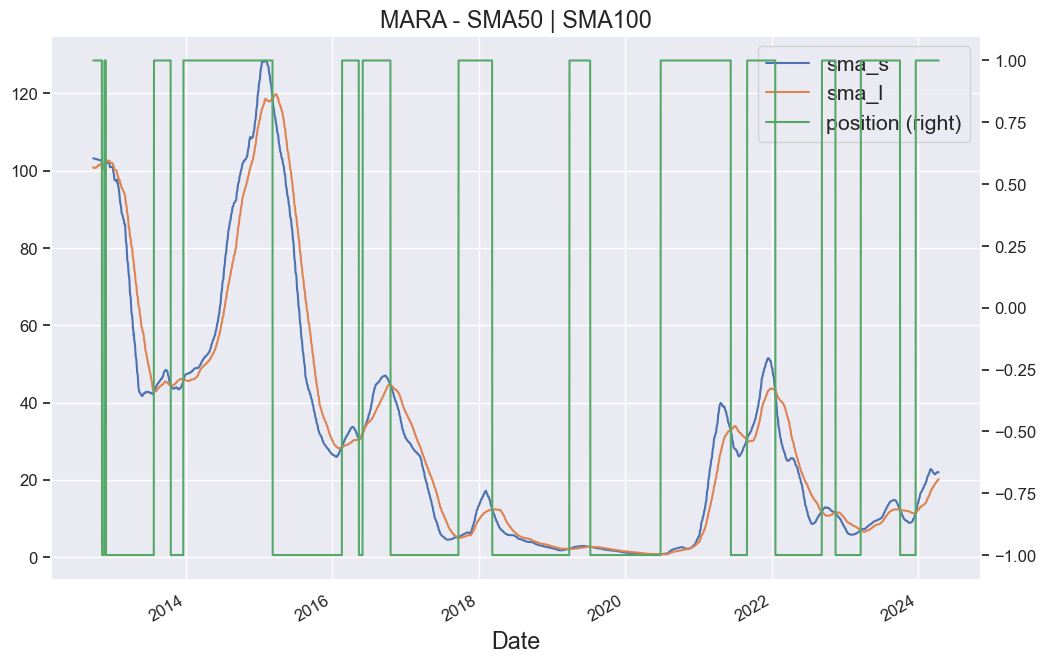

In [207]:
data_mara.loc[:, ['sma_s', 'sma_l', 'position']].plot(figsize=(12,8), title=f"MARA - SMA{sma_s} | SMA{sma_l}", fontsize=12, secondary_y="position")

In [208]:
data_mara["position_2"] = np.where(data_mara['sma_s']>data_mara["sma_l"], 1, 0)
data_mara

Close       sma_s     sma_l  position  returns_bh  strategy  \
Date                                                                           
2012-09-26  104.000000  103.230401  100.9112         1    0.000000  0.000000   
2012-09-27  104.000000  103.209601  100.7552         1    0.000000  0.000000   
2012-09-28  104.000000  103.188801  100.7552         1    0.000000  0.000000   
2012-10-01  104.000000  103.168001  100.7552         1    0.000000  0.000000   
2012-10-02  104.000000  103.147201  100.7552         1    0.000000  0.000000   
...                ...         ...       ...       ...         ...       ...   
2024-04-08   17.950001   22.017200   19.8703         1   -0.026390 -0.026390   
2024-04-09   17.980000   22.019800   19.9583         1    0.001670  0.001670   
2024-04-10   17.379999   21.997000   20.0404         1   -0.033940 -0.033940   
2024-04-11   17.600000   21.986800   20.1140         1    0.012579  0.012579   
2024-04-12   16.110001   21.954400   20.1775         1   -0.088459 -0.088459   

            position_2  
Date                    
2012-09-26           1  
2012-09-27           1  
2012-09-28           1  
2012-10-01           1  
2012-10-02           1  
...                ...  
2024-04-08           1  
2024-04-09           1  
2024-04-10           1  
2024-04-11           1  
2024-04-12           1  

[2904 rows x 7 columns]

In [209]:
data_mara["strategy_2"] = data_mara["returns_bh"]*data_mara.position_2.shift(1)
data_mara

Close       sma_s     sma_l  position  returns_bh  strategy  \
Date                                                                           
2012-09-26  104.000000  103.230401  100.9112         1    0.000000  0.000000   
2012-09-27  104.000000  103.209601  100.7552         1    0.000000  0.000000   
2012-09-28  104.000000  103.188801  100.7552         1    0.000000  0.000000   
2012-10-01  104.000000  103.168001  100.7552         1    0.000000  0.000000   
2012-10-02  104.000000  103.147201  100.7552         1    0.000000  0.000000   
...                ...         ...       ...       ...         ...       ...   
2024-04-08   17.950001   22.017200   19.8703         1   -0.026390 -0.026390   
2024-04-09   17.980000   22.019800   19.9583         1    0.001670  0.001670   
2024-04-10   17.379999   21.997000   20.0404         1   -0.033940 -0.033940   
2024-04-11   17.600000   21.986800   20.1140         1    0.012579  0.012579   
2024-04-12   16.110001   21.954400   20.1775         1   -0.088459 -0.088459   

            position_2  strategy_2  
Date                                
2012-09-26           1         NaN  
2012-09-27           1    0.000000  
2012-09-28           1    0.000000  
2012-10-01           1    0.000000  
2012-10-02           1    0.000000  
...                ...         ...  
2024-04-08           1   -0.026390  
2024-04-09           1    0.001670  
2024-04-10           1   -0.033940  
2024-04-11           1    0.012579  
2024-04-12           1   -0.088459  

[2904 rows x 8 columns]

In [210]:
data_mara.dropna(inplace=True)
data_mara

Close       sma_s     sma_l  position  returns_bh  strategy  \
Date                                                                           
2012-09-27  104.000000  103.209601  100.7552         1    0.000000  0.000000   
2012-09-28  104.000000  103.188801  100.7552         1    0.000000  0.000000   
2012-10-01  104.000000  103.168001  100.7552         1    0.000000  0.000000   
2012-10-02  104.000000  103.147201  100.7552         1    0.000000  0.000000   
2012-10-03  104.000000  103.126401  100.7448         1    0.000000  0.000000   
...                ...         ...       ...       ...         ...       ...   
2024-04-08   17.950001   22.017200   19.8703         1   -0.026390 -0.026390   
2024-04-09   17.980000   22.019800   19.9583         1    0.001670  0.001670   
2024-04-10   17.379999   21.997000   20.0404         1   -0.033940 -0.033940   
2024-04-11   17.600000   21.986800   20.1140         1    0.012579  0.012579   
2024-04-12   16.110001   21.954400   20.1775         1   -0.088459 -0.088459   

            position_2  strategy_2  
Date                                
2012-09-27           1    0.000000  
2012-09-28           1    0.000000  
2012-10-01           1    0.000000  
2012-10-02           1    0.000000  
2012-10-03           1    0.000000  
...                ...         ...  
2024-04-08           1   -0.026390  
2024-04-09           1    0.001670  
2024-04-10           1   -0.033940  
2024-04-11           1    0.012579  
2024-04-12           1   -0.088459  

[2903 rows x 8 columns]

In [211]:
data_mara[["returns_bh", "strategy", "strategy_2"]].sum() 

returns_bh   -1.864951
strategy      5.051974
strategy_2    1.593512
dtype: float64

In [212]:
data_mara[["returns_bh", "strategy", "strategy_2"]].sum().apply(np.exp)

returns_bh      0.154904
strategy      156.330824
strategy_2      4.921001
dtype: float64

In [280]:
data_mara[["returns_bh", "strategy", "strategy_2"]].std()*np.sqrt(252) # annual stdev
## long/short best for MARA

returns_bh    1.388191
strategy      1.387953
strategy_2    0.861876
dtype: float64

## GOLD

In [216]:
#gather the data
gold = yf.download("GOLD")
gold = gold.Close.to_frame()
data_gold = gold.Close.loc[(gold.index >='1991-01-01')].to_frame()

sma_s=50
sma_l=100

data_gold["sma_s"] = data_gold.Close.rolling(window=sma_s).mean()
data_gold["sma_l"] = data_gold.Close.rolling(window=sma_l).mean()
data_gold

[*********************100%%**********************]  1 of 1 completed


Close    sma_s    sma_l
Date                                   
1991-01-02  10.750000      NaN      NaN
1991-01-03  10.812500      NaN      NaN
1991-01-04  10.375000      NaN      NaN
1991-01-07  10.750000      NaN      NaN
1991-01-08  10.687500      NaN      NaN
...               ...      ...      ...
2024-04-08  17.700001  15.5186  16.2223
2024-04-09  18.010000  15.5682  16.2511
2024-04-10  17.900000  15.6122  16.2730
2024-04-11  18.040001  15.6594  16.2973
2024-04-12  17.860001  15.7046  16.3171

[8383 rows x 3 columns]

<Axes: title={'center': 'GOLD - SMA50 | SMA100'}, xlabel='Date'>

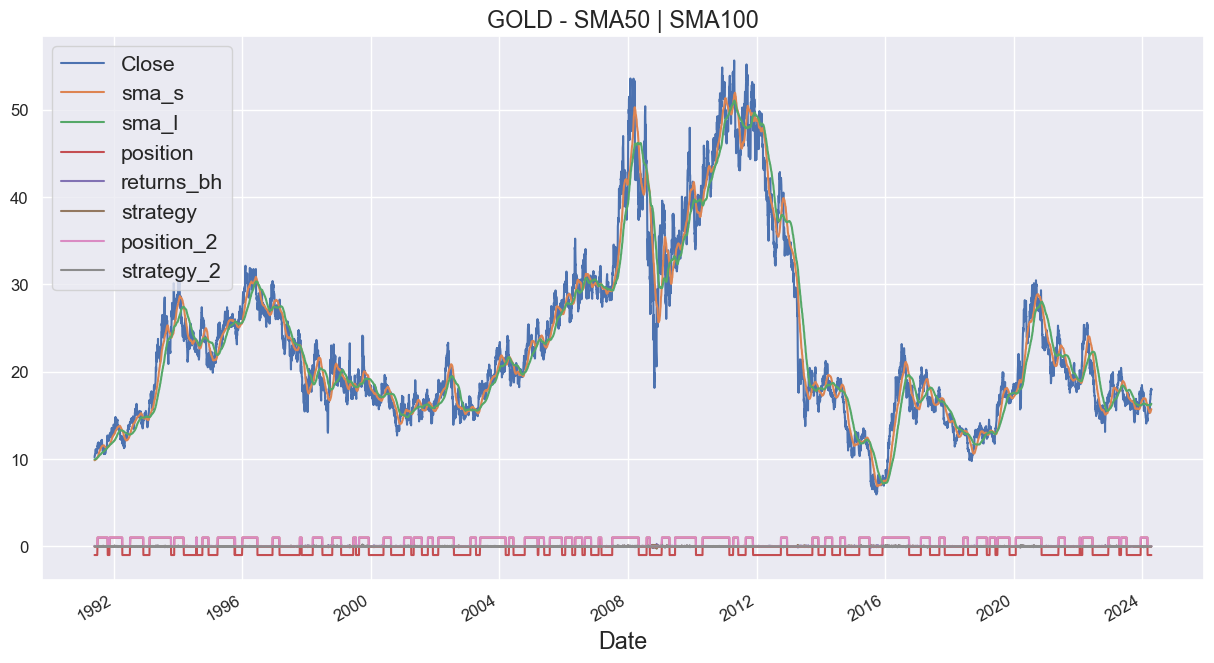

In [248]:
#plot the data
data_gold.plot(figsize=(15,8), title=f"GOLD - SMA{sma_s} | SMA{sma_l}", fontsize=12)

In [219]:
data_gold.dropna(inplace=True)

In [220]:
data_gold["position"] = np.where(data_gold['sma_s']>data_gold["sma_l"], 1, -1)
data_gold["returns_bh"] = np.log(data_gold.Close.div(data_gold.Close.shift(1)))
data_gold

Close     sma_s      sma_l  position  returns_bh
Date                                                            
1991-05-23   9.562500   9.87000   9.968750        -1         NaN
1991-05-24   9.687500   9.85500   9.958125        -1    0.012987
1991-05-28  10.187500   9.85125   9.951875        -1    0.050325
1991-05-29  10.312500   9.85375   9.951250        -1    0.012195
1991-05-30  10.375000   9.85625   9.947500        -1    0.006042
...               ...       ...        ...       ...         ...
2024-04-08  17.700001  15.51860  16.222300        -1   -0.008999
2024-04-09  18.010000  15.56820  16.251100        -1    0.017362
2024-04-10  17.900000  15.61220  16.273000        -1   -0.006126
2024-04-11  18.040001  15.65940  16.297300        -1    0.007791
2024-04-12  17.860001  15.70460  16.317100        -1   -0.010028

[8284 rows x 5 columns]

In [221]:
# create strategy 1 and dropnas
data_gold["strategy"] = data_gold["returns_bh"]*data_gold.position.shift(1)
data_gold.dropna(inplace=True)
data_gold

Close     sma_s      sma_l  position  returns_bh  strategy
Date                                                                      
1991-05-24   9.687500   9.85500   9.958125        -1    0.012987 -0.012987
1991-05-28  10.187500   9.85125   9.951875        -1    0.050325 -0.050325
1991-05-29  10.312500   9.85375   9.951250        -1    0.012195 -0.012195
1991-05-30  10.375000   9.85625   9.947500        -1    0.006042 -0.006042
1991-05-31  10.437500   9.86375   9.945000        -1    0.006006 -0.006006
...               ...       ...        ...       ...         ...       ...
2024-04-08  17.700001  15.51860  16.222300        -1   -0.008999  0.008999
2024-04-09  18.010000  15.56820  16.251100        -1    0.017362 -0.017362
2024-04-10  17.900000  15.61220  16.273000        -1   -0.006126  0.006126
2024-04-11  18.040001  15.65940  16.297300        -1    0.007791 -0.007791
2024-04-12  17.860001  15.70460  16.317100        -1   -0.010028  0.010028

[8283 rows x 6 columns]

In [223]:
# create positions 2 and strategy 2 and dropnas
data_gold["position_2"] = np.where(data_gold['sma_s']>data_gold["sma_l"], 1, 0)
data_gold["strategy_2"] = data_gold["returns_bh"]*data_gold.position_2.shift(1)
data_gold.dropna(inplace=True)
data_gold

Close     sma_s      sma_l  position  returns_bh  strategy  \
Date                                                                         
1991-05-28  10.187500   9.85125   9.951875        -1    0.050325 -0.050325   
1991-05-29  10.312500   9.85375   9.951250        -1    0.012195 -0.012195   
1991-05-30  10.375000   9.85625   9.947500        -1    0.006042 -0.006042   
1991-05-31  10.437500   9.86375   9.945000        -1    0.006006 -0.006006   
1991-06-03  10.500000   9.87125   9.943750        -1    0.005970 -0.005970   
...               ...       ...        ...       ...         ...       ...   
2024-04-08  17.700001  15.51860  16.222300        -1   -0.008999  0.008999   
2024-04-09  18.010000  15.56820  16.251100        -1    0.017362 -0.017362   
2024-04-10  17.900000  15.61220  16.273000        -1   -0.006126  0.006126   
2024-04-11  18.040001  15.65940  16.297300        -1    0.007791 -0.007791   
2024-04-12  17.860001  15.70460  16.317100        -1   -0.010028  0.010028   

            position_2  strategy_2  
Date                                
1991-05-28           0         0.0  
1991-05-29           0         0.0  
1991-05-30           0         0.0  
1991-05-31           0         0.0  
1991-06-03           0         0.0  
...                ...         ...  
2024-04-08           0        -0.0  
2024-04-09           0         0.0  
2024-04-10           0        -0.0  
2024-04-11           0         0.0  
2024-04-12           0        -0.0  

[8282 rows x 8 columns]

In [224]:
# returns 
data_gold[["returns_bh", "strategy", "strategy_2"]].sum()

returns_bh    0.611727
strategy     -4.265885
strategy_2   -1.827079
dtype: float64

In [225]:
# $1 value at end
data_gold[["returns_bh", "strategy", "strategy_2"]].sum().apply(np.exp)

returns_bh    1.843613
strategy      0.014039
strategy_2    0.160883
dtype: float64

In [228]:
# risk
data_gold[["returns_bh", "strategy", "strategy_2"]].std()*np.sqrt(252)
## buy and hold works best for GOLD

returns_bh    0.399367
strategy      0.399285
strategy_2    0.278569
dtype: float64

## NVDA

In [246]:
#gather the data
nvda = yf.download("NVDA")
nvda = nvda.Close.to_frame()
data_nvda = nvda.Close.loc[(nvda.index >='1991-01-01')].to_frame()

sma_s=50
sma_l=100

data_nvda["sma_s"] = data_nvda.Close.rolling(window=sma_s).mean()
data_nvda["sma_l"] = data_nvda.Close.rolling(window=sma_l).mean()
data_nvda

[*********************100%%**********************]  1 of 1 completed


Close       sma_s       sma_l
Date                                          
1999-01-22    0.410156         NaN         NaN
1999-01-25    0.453125         NaN         NaN
1999-01-26    0.417969         NaN         NaN
1999-01-27    0.416667         NaN         NaN
1999-01-28    0.415365         NaN         NaN
...                ...         ...         ...
2024-04-08  871.330017  803.496400  654.629800
2024-04-09  853.539978  808.361000  658.303199
2024-04-10  870.390015  813.275800  662.041500
2024-04-11  906.159973  818.844199  666.214299
2024-04-12  881.859985  824.175999  670.084899

[6347 rows x 3 columns]

<Axes: title={'center': 'NVDA - SMA50 | SMA100'}, xlabel='Date'>

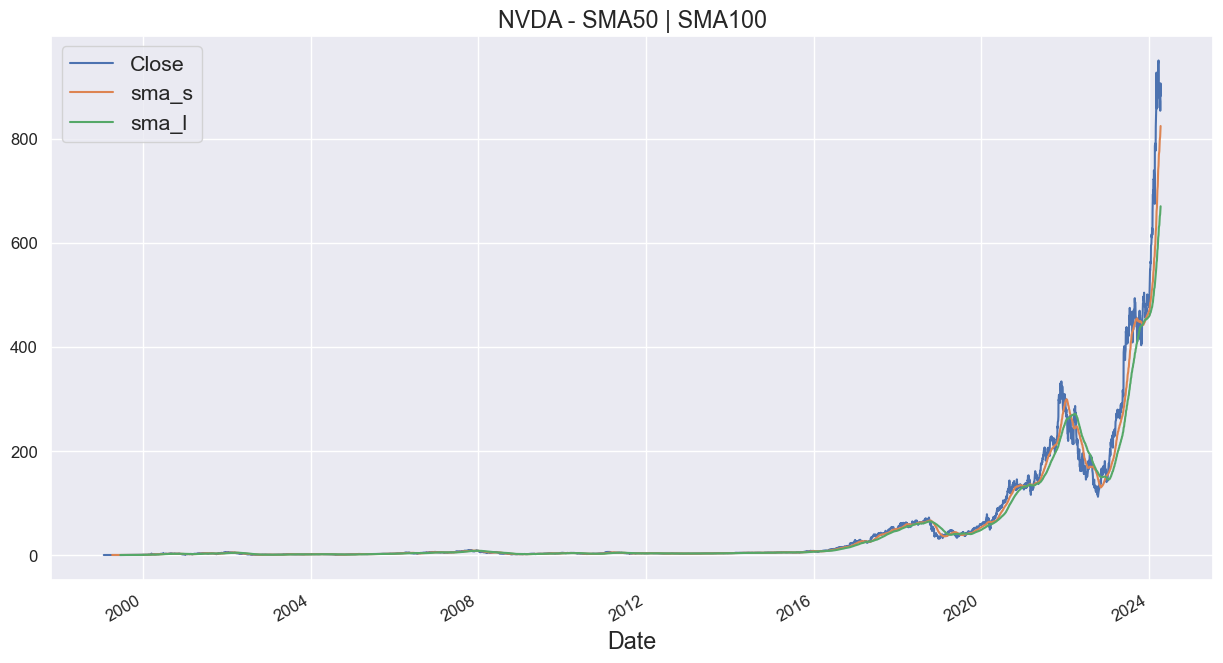

In [249]:
# plot the data
data_nvda.plot(figsize=(15,8), title=f"NVDA - SMA{sma_s} | SMA{sma_l}", fontsize=12)

In [250]:
# dropnas
data_nvda.dropna(inplace=True)

In [251]:
# make position 1 and returns bh
data_nvda["position"] = np.where(data_nvda['sma_s']>data_nvda["sma_l"], 1, -1)
data_nvda["returns_bh"] = np.log(data_nvda.Close.div(data_nvda.Close.shift(1)))
data_nvda

Close       sma_s       sma_l  position  returns_bh
Date                                                                
1999-06-15    0.354167    0.378425    0.402220        -1         NaN
1999-06-16    0.364583    0.377643    0.401764        -1    0.028986
1999-06-17    0.354167    0.375977    0.400775        -1   -0.028986
1999-06-18    0.341146    0.373893    0.400007        -1   -0.037458
1999-06-21    0.359375    0.372331    0.399434        -1    0.052056
...                ...         ...         ...       ...         ...
2024-04-08  871.330017  803.496400  654.629800         1   -0.009992
2024-04-09  853.539978  808.361000  658.303199         1   -0.020628
2024-04-10  870.390015  813.275800  662.041500         1    0.019549
2024-04-11  906.159973  818.844199  666.214299         1    0.040274
2024-04-12  881.859985  824.175999  670.084899         1   -0.027183

[6248 rows x 5 columns]

In [252]:
# create strategy 1 and dropnas
data_nvda["strategy"] = data_nvda["returns_bh"]*data_nvda.position.shift(1)
data_nvda.dropna(inplace=True)
data_nvda

Close       sma_s       sma_l  position  returns_bh  strategy
Date                                                                          
1999-06-16    0.364583    0.377643    0.401764        -1    0.028986 -0.028986
1999-06-17    0.354167    0.375977    0.400775        -1   -0.028986  0.028986
1999-06-18    0.341146    0.373893    0.400007        -1   -0.037458  0.037458
1999-06-21    0.359375    0.372331    0.399434        -1    0.052056 -0.052056
1999-06-22    0.352865    0.371003    0.398809        -1   -0.018281  0.018281
...                ...         ...         ...       ...         ...       ...
2024-04-08  871.330017  803.496400  654.629800         1   -0.009992 -0.009992
2024-04-09  853.539978  808.361000  658.303199         1   -0.020628 -0.020628
2024-04-10  870.390015  813.275800  662.041500         1    0.019549  0.019549
2024-04-11  906.159973  818.844199  666.214299         1    0.040274  0.040274
2024-04-12  881.859985  824.175999  670.084899         1   -0.027183 -0.027183

[6247 rows x 6 columns]

In [253]:
# create positions 2 and strategy 2 and dropnas
data_nvda["position_2"] = np.where(data_nvda['sma_s']>data_nvda["sma_l"], 1, 0)
data_nvda["strategy_2"] = data_nvda["returns_bh"]*data_nvda.position_2.shift(1)
data_nvda.dropna(inplace=True)
data_nvda

Close       sma_s       sma_l  position  returns_bh  \
Date                                                                   
1999-06-17    0.354167    0.375977    0.400775        -1   -0.028986   
1999-06-18    0.341146    0.373893    0.400007        -1   -0.037458   
1999-06-21    0.359375    0.372331    0.399434        -1    0.052056   
1999-06-22    0.352865    0.371003    0.398809        -1   -0.018281   
1999-06-23    0.359375    0.370143    0.398444        -1    0.018281   
...                ...         ...         ...       ...         ...   
2024-04-08  871.330017  803.496400  654.629800         1   -0.009992   
2024-04-09  853.539978  808.361000  658.303199         1   -0.020628   
2024-04-10  870.390015  813.275800  662.041500         1    0.019549   
2024-04-11  906.159973  818.844199  666.214299         1    0.040274   
2024-04-12  881.859985  824.175999  670.084899         1   -0.027183   

            strategy  position_2  strategy_2  
Date                                          
1999-06-17  0.028986           0   -0.000000  
1999-06-18  0.037458           0   -0.000000  
1999-06-21 -0.052056           0    0.000000  
1999-06-22  0.018281           0   -0.000000  
1999-06-23 -0.018281           0    0.000000  
...              ...         ...         ...  
2024-04-08 -0.009992           1   -0.009992  
2024-04-09 -0.020628           1   -0.020628  
2024-04-10  0.019549           1    0.019549  
2024-04-11  0.040274           1    0.040274  
2024-04-12 -0.027183           1   -0.027183  

[6246 rows x 8 columns]

In [254]:
# returns 
data_nvda[["returns_bh", "strategy", "strategy_2"]].sum()

returns_bh    7.791034
strategy      9.350563
strategy_2    8.570799
dtype: float64

In [256]:
# $1 value at end
data_nvda[["returns_bh", "strategy", "strategy_2"]].sum().apply(np.exp)

returns_bh     2418.818267
strategy      11505.297529
strategy_2     5275.341110
dtype: float64

In [258]:
# risk
data_nvda[["returns_bh", "strategy", "strategy_2"]].std()*np.sqrt(252)
## long/short works best for NVDA

returns_bh    0.598018
strategy      0.597874
strategy_2    0.443727
dtype: float64

## CCL 

In [259]:
#gather the data
ccl = yf.download("CCL")
ccl = ccl.Close.to_frame()
data_ccl = ccl.Close.loc[(ccl.index >='1991-01-01')].to_frame()

sma_s=50
sma_l=100

data_ccl["sma_s"] = data_ccl.Close.rolling(window=sma_s).mean()
data_ccl["sma_l"] = data_ccl.Close.rolling(window=sma_l).mean()
data_ccl

[*********************100%%**********************]  1 of 1 completed


Close    sma_s    sma_l
Date                                  
1991-01-02   3.53125      NaN      NaN
1991-01-03   3.46875      NaN      NaN
1991-01-04   3.40625      NaN      NaN
1991-01-07   3.25000      NaN      NaN
1991-01-08   3.21875      NaN      NaN
...              ...      ...      ...
2024-04-08  15.66000  15.9282  16.3374
2024-04-09  15.50000  15.9216  16.3646
2024-04-10  14.95000  15.8896  16.3752
2024-04-11  14.97000  15.8596  16.3792
2024-04-12  14.36000  15.8152  16.3747

[8383 rows x 3 columns]

<Axes: title={'center': 'CCL - SMA50 | SMA100'}, xlabel='Date'>

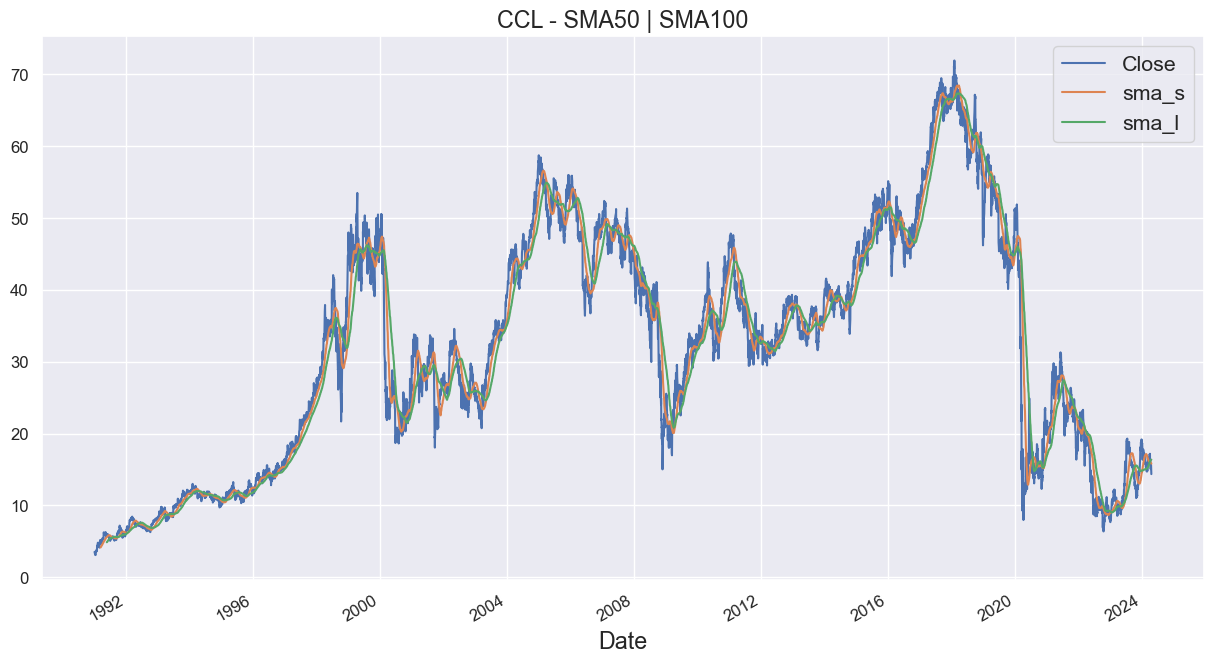

In [260]:
# plot the data
data_ccl.plot(figsize=(15,8), title=f"CCL - SMA{sma_s} | SMA{sma_l}", fontsize=12)

In [261]:
# dropnas
data_ccl.dropna(inplace=True)

In [262]:
# make position 1 and returns bh
data_ccl["position"] = np.where(data_ccl['sma_s']>data_ccl["sma_l"], 1, -1)
data_ccl["returns_bh"] = np.log(data_ccl.Close.div(data_ccl.Close.shift(1)))
data_ccl

Close      sma_s      sma_l  position  returns_bh
Date                                                            
1991-05-23   5.75000   5.596250   4.871875         1         NaN
1991-05-24   5.81250   5.610625   4.894687         1    0.010811
1991-05-28   5.93750   5.630000   4.919375         1    0.021277
1991-05-29   5.96875   5.651250   4.945000         1    0.005249
1991-05-30   5.75000   5.672500   4.970000         1   -0.037338
...              ...        ...        ...       ...         ...
2024-04-08  15.66000  15.928200  16.337400        -1    0.035091
2024-04-09  15.50000  15.921600  16.364600        -1   -0.010270
2024-04-10  14.95000  15.889600  16.375200        -1   -0.036129
2024-04-11  14.97000  15.859600  16.379200        -1    0.001337
2024-04-12  14.36000  15.815200  16.374700        -1   -0.041602

[8284 rows x 5 columns]

In [263]:
# create strategy 1 and dropnas
data_ccl["strategy"] = data_ccl["returns_bh"]*data_ccl.position.shift(1)
data_ccl.dropna(inplace=True)
data_ccl

Close      sma_s      sma_l  position  returns_bh  strategy
Date                                                                      
1991-05-24   5.81250   5.610625   4.894687         1    0.010811  0.010811
1991-05-28   5.93750   5.630000   4.919375         1    0.021277  0.021277
1991-05-29   5.96875   5.651250   4.945000         1    0.005249  0.005249
1991-05-30   5.75000   5.672500   4.970000         1   -0.037338 -0.037338
1991-05-31   5.93750   5.696250   4.997187         1    0.032088  0.032088
...              ...        ...        ...       ...         ...       ...
2024-04-08  15.66000  15.928200  16.337400        -1    0.035091 -0.035091
2024-04-09  15.50000  15.921600  16.364600        -1   -0.010270  0.010270
2024-04-10  14.95000  15.889600  16.375200        -1   -0.036129  0.036129
2024-04-11  14.97000  15.859600  16.379200        -1    0.001337 -0.001337
2024-04-12  14.36000  15.815200  16.374700        -1   -0.041602  0.041602

[8283 rows x 6 columns]

In [264]:
# create positions 2 and strategy 2 and dropnas
data_ccl["position_2"] = np.where(data_ccl['sma_s']>data_ccl["sma_l"], 1, 0)
data_ccl["strategy_2"] = data_ccl["returns_bh"]*data_ccl.position_2.shift(1)
data_ccl.dropna(inplace=True)
data_ccl

Close      sma_s      sma_l  position  returns_bh  strategy  \
Date                                                                         
1991-05-28   5.93750   5.630000   4.919375         1    0.021277  0.021277   
1991-05-29   5.96875   5.651250   4.945000         1    0.005249  0.005249   
1991-05-30   5.75000   5.672500   4.970000         1   -0.037338 -0.037338   
1991-05-31   5.93750   5.696250   4.997187         1    0.032088  0.032088   
1991-06-03   5.93750   5.716875   5.024375         1    0.000000  0.000000   
...              ...        ...        ...       ...         ...       ...   
2024-04-08  15.66000  15.928200  16.337400        -1    0.035091 -0.035091   
2024-04-09  15.50000  15.921600  16.364600        -1   -0.010270  0.010270   
2024-04-10  14.95000  15.889600  16.375200        -1   -0.036129  0.036129   
2024-04-11  14.97000  15.859600  16.379200        -1    0.001337 -0.001337   
2024-04-12  14.36000  15.815200  16.374700        -1   -0.041602  0.041602   

            position_2  strategy_2  
Date                                
1991-05-28           1    0.021277  
1991-05-29           1    0.005249  
1991-05-30           1   -0.037338  
1991-05-31           1    0.032088  
1991-06-03           1    0.000000  
...                ...         ...  
2024-04-08           0    0.000000  
2024-04-09           0   -0.000000  
2024-04-10           0   -0.000000  
2024-04-11           0    0.000000  
2024-04-12           0   -0.000000  

[8282 rows x 8 columns]

In [265]:
# returns 
data_ccl[["returns_bh", "strategy", "strategy_2"]].sum()

returns_bh    0.904436
strategy     -1.973445
strategy_2   -0.534504
dtype: float64

In [266]:
# $1 value at end
data_ccl[["returns_bh", "strategy", "strategy_2"]].sum().apply(np.exp)

returns_bh    2.470538
strategy      0.138977
strategy_2    0.585960
dtype: float64

In [268]:
# risk
data_nvda[["returns_bh", "strategy", "strategy_2"]].std()*np.sqrt(252)
## buy and hold works best for CCL

returns_bh    0.598018
strategy      0.597874
strategy_2    0.443727
dtype: float64

## VALE

In [269]:
#gather the data
vale = yf.download("VALE")
vale = vale.Close.to_frame()
data_vale = vale.Close.loc[(vale.index >='1991-01-01')].to_frame()

sma_s=50
sma_l=100

data_vale["sma_s"] = data_vale.Close.rolling(window=sma_s).mean()
data_vale["sma_l"] = data_vale.Close.rolling(window=sma_l).mean()
data_vale

[*********************100%%**********************]  1 of 1 completed


Close    sma_s    sma_l
Date                                   
2002-03-21   2.250000      NaN      NaN
2002-03-22   2.179167      NaN      NaN
2002-03-25   2.179167      NaN      NaN
2002-03-26   2.236667      NaN      NaN
2002-03-27   2.270833      NaN      NaN
...               ...      ...      ...
2024-04-08  12.500000  12.9512  13.9710
2024-04-09  12.500000  12.9178  13.9513
2024-04-10  12.150000  12.8810  13.9212
2024-04-11  12.170000  12.8466  13.8922
2024-04-12  12.020000  12.8132  13.8604

[5554 rows x 3 columns]

<Axes: title={'center': 'VALE - SMA50 | SMA100'}, xlabel='Date'>

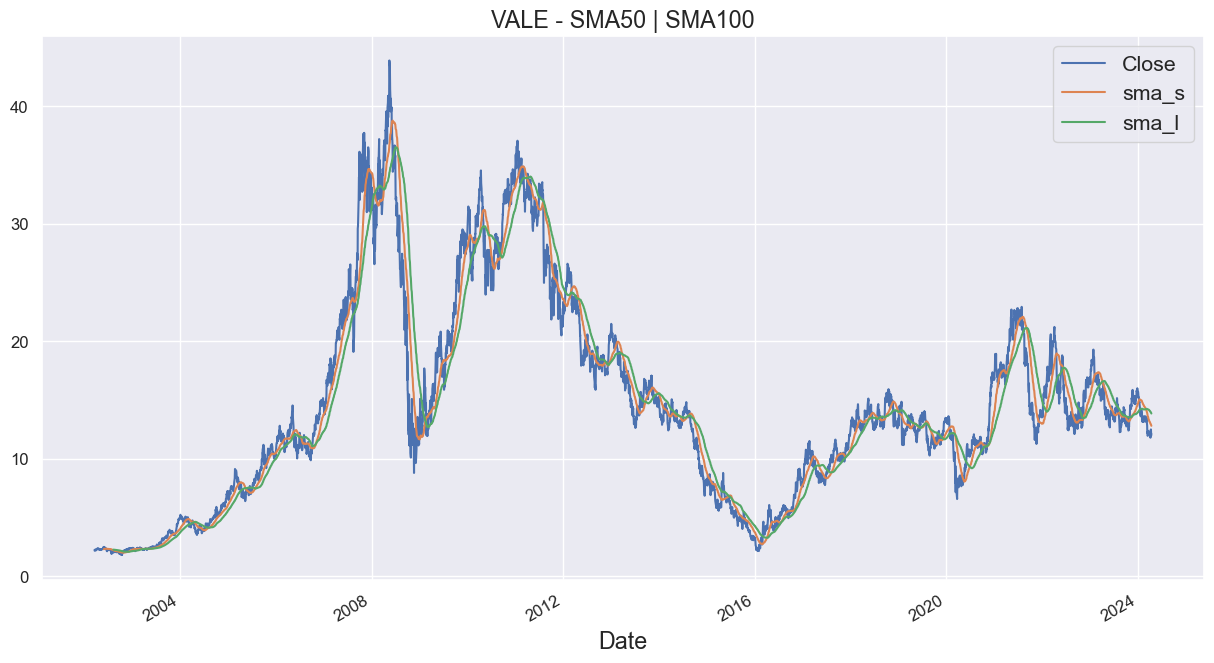

In [270]:
# plot the data
data_vale.plot(figsize=(15,8), title=f"VALE - SMA{sma_s} | SMA{sma_l}", fontsize=12)

In [271]:
# dropnas
data_vale.dropna(inplace=True)

In [272]:
# make position 1 and returns bh
data_vale["position"] = np.where(data_vale['sma_s']>data_vale["sma_l"], 1, -1)
data_vale["returns_bh"] = np.log(data_vale.Close.div(data_vale.Close.shift(1)))
data_vale

Close      sma_s      sma_l  position  returns_bh
Date                                                             
2002-08-12   2.068333   2.230300   2.271083        -1         NaN
2002-08-13   2.029167   2.220883   2.268875        -1   -0.019118
2002-08-14   2.043333   2.212150   2.267517        -1    0.006957
2002-08-15   2.045833   2.203483   2.266183        -1    0.001223
2002-08-16   2.159167   2.198300   2.265408        -1    0.053917
...               ...        ...        ...       ...         ...
2024-04-08  12.500000  12.951200  13.971000        -1    0.057629
2024-04-09  12.500000  12.917800  13.951300        -1    0.000000
2024-04-10  12.150000  12.881000  13.921200        -1   -0.028400
2024-04-11  12.170000  12.846600  13.892200        -1    0.001645
2024-04-12  12.020000  12.813200  13.860400        -1   -0.012402

[5455 rows x 5 columns]

In [273]:
# create strategy 1 and dropnas
data_vale["strategy"] = data_vale["returns_bh"]*data_vale.position.shift(1)
data_vale.dropna(inplace=True)
data_vale

Close      sma_s      sma_l  position  returns_bh  strategy
Date                                                                       
2002-08-13   2.029167   2.220883   2.268875        -1   -0.019118  0.019118
2002-08-14   2.043333   2.212150   2.267517        -1    0.006957 -0.006957
2002-08-15   2.045833   2.203483   2.266183        -1    0.001223 -0.001223
2002-08-16   2.159167   2.198300   2.265408        -1    0.053917 -0.053917
2002-08-19   2.100000   2.191700   2.263700        -1   -0.027785  0.027785
...               ...        ...        ...       ...         ...       ...
2024-04-08  12.500000  12.951200  13.971000        -1    0.057629 -0.057629
2024-04-09  12.500000  12.917800  13.951300        -1    0.000000 -0.000000
2024-04-10  12.150000  12.881000  13.921200        -1   -0.028400  0.028400
2024-04-11  12.170000  12.846600  13.892200        -1    0.001645 -0.001645
2024-04-12  12.020000  12.813200  13.860400        -1   -0.012402  0.012402

[5454 rows x 6 columns]

In [274]:
# create positions 2 and strategy 2 and dropnas
data_vale["position_2"] = np.where(data_vale['sma_s']>data_vale["sma_l"], 1, 0)
data_vale["strategy_2"] = data_vale["returns_bh"]*data_vale.position_2.shift(1)
data_vale.dropna(inplace=True)
data_vale

Close      sma_s      sma_l  position  returns_bh  strategy  \
Date                                                                          
2002-08-14   2.043333   2.212150   2.267517        -1    0.006957 -0.006957   
2002-08-15   2.045833   2.203483   2.266183        -1    0.001223 -0.001223   
2002-08-16   2.159167   2.198300   2.265408        -1    0.053917 -0.053917   
2002-08-19   2.100000   2.191700   2.263700        -1   -0.027785  0.027785   
2002-08-20   2.090833   2.185150   2.261783        -1   -0.004375  0.004375   
...               ...        ...        ...       ...         ...       ...   
2024-04-08  12.500000  12.951200  13.971000        -1    0.057629 -0.057629   
2024-04-09  12.500000  12.917800  13.951300        -1    0.000000 -0.000000   
2024-04-10  12.150000  12.881000  13.921200        -1   -0.028400  0.028400   
2024-04-11  12.170000  12.846600  13.892200        -1    0.001645 -0.001645   
2024-04-12  12.020000  12.813200  13.860400        -1   -0.012402  0.012402   

            position_2  strategy_2  
Date                                
2002-08-14           0         0.0  
2002-08-15           0         0.0  
2002-08-16           0         0.0  
2002-08-19           0        -0.0  
2002-08-20           0        -0.0  
...                ...         ...  
2024-04-08           0         0.0  
2024-04-09           0         0.0  
2024-04-10           0        -0.0  
2024-04-11           0         0.0  
2024-04-12           0        -0.0  

[5453 rows x 8 columns]

In [275]:
# returns 
data_vale[["returns_bh", "strategy", "strategy_2"]].sum()

returns_bh    1.778947
strategy      2.729097
strategy_2    2.254022
dtype: float64

In [278]:
# $1 value at end
data_vale[["returns_bh", "strategy", "strategy_2"]].sum().apply(np.exp)

returns_bh     5.923613
strategy      15.319046
strategy_2     9.525970
dtype: float64

In [279]:
# risk
data_vale[["returns_bh", "strategy", "strategy_2"]].std()*np.sqrt(252)
## long/short works best for VALE

returns_bh    0.474100
strategy      0.474062
strategy_2    0.309456
dtype: float64

In [285]:
print(data_mara['strategy'].sum())
print(data_gold['returns_bh'].sum())
print(data_nvda['strategy'].sum())
print(data_ccl['returns_bh'].sum())
print(data_vale['strategy'].sum())

5.051974430654365
0.611727214943104
9.350562862966466
0.904435768798334
2.729096860553912


In [286]:
print(data_mara['strategy'].std()*np.sqrt(252))
print(data_gold['returns_bh'].std()*np.sqrt(252))
print(data_nvda['strategy'].std()*np.sqrt(252))
print(data_ccl['returns_bh'].std()*np.sqrt(252))
print(data_vale['strategy'].std()*np.sqrt(252))

1.3879534921061312
0.3993670110062792
0.5978739730198073
0.43364664290645005
0.47406204967995885


In [287]:
sharpe_ish_mara = (data_mara['strategy'].sum())/ (data_mara['strategy'].std()*np.sqrt(252))
sharpe_ish_gold = (data_gold['returns_bh'].sum()) / (data_gold['returns_bh'].std()*np.sqrt(252))
sharpe_ish_nvda = (data_nvda['strategy'].sum()) / (data_nvda['strategy'].std()*np.sqrt(252))
sharpe_ish_ccl = (data_ccl['returns_bh'].sum()) / (data_ccl['returns_bh'].std()*np.sqrt(252))
sharpe_ish_vale = (data_vale['strategy'].sum()) / (data_vale['strategy'].std()*np.sqrt(252))

In [288]:
print(sharpe_ish_mara)
print(sharpe_ish_gold)
print(sharpe_ish_nvda)
print(sharpe_ish_ccl)
print(sharpe_ish_vale)

3.6398729924216084
1.5317419768892375
15.639688772096267
2.085651494351466
5.756834706335037


### our stocks will be: MARA, NVDA, and VALE

# Creating Function

In [291]:
def test_strategy(stock, start, end, SMA):
    df = yf.download(stock, start=start, end=end)
    data = df.Close.to_frame()
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(window=int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(window=int(SMA[1])).mean()
    data.dropna(inplace=True)

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data["returns"] * data.position.shift(1)
    data.dropna(inplace=True)
    ret = round(np.exp(data["strategy"].sum()), 2)
    std = round(data["strategy"].std() * np.sqrt(252), 2)

    return ret, std

In [295]:
test_strategy("SPY", "2000-01-01", "2020-01-01", (50,200))

[*********************100%%**********************]  1 of 1 completed


(4.77, 0.19)

## Creating first Class

In [301]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()

    def get_data(self):
        df = yf.download(self.symbol, start=self.start, end=self.end)
        data = df.Close.to_frame()
        data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"] = data.Close.rolling(window=self.SMA_S).mean()
        data["SMA_L"] = data.Close.rolling(window=self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data_two = data

        return data
    
    def test_results(self):
        data=self.data_two.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["returns"] * data.position.shift(1)
        data.dropna(inplace=True)
        data["returns_bh"] = data["returns"].cumsum().apply(np.exp)
        data["returns_strategy"] = data["strategy"].cumsum().apply(np.exp)
        perf = data["returns_strategy"].iloc[-1]
        outperf = perf - data["returns_bh"].iloc[-1]
        self.results=data

        ret = round(np.exp(data["strategy"].sum()), 2)
        std = round(data["strategy"].std() * np.sqrt(252), 2)

        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please")
        else:
            title=f"{self.symbol}| SMA_S={self.SMA_S} | SMA_L={self.SMA_L}"
            self.results[["returns_bh", "returns_strategy"]].plot(title=title, figsize=(12,8))

    

In [303]:
tester = SMABacktester("SPY", 50, 100, "2000-01-01", "2020-01-01")

[*********************100%%**********************]  1 of 1 completed


In [304]:
tester.test_results()

(2.592726, 0.297824)

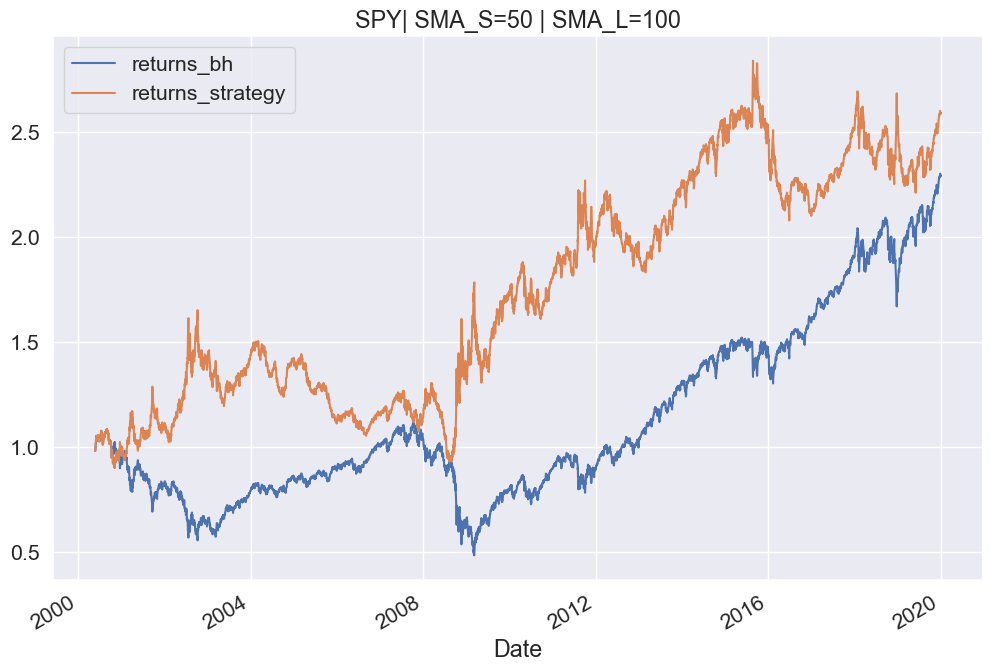

In [305]:
tester.plot_results()

## Stan Weinstein Strategy
### 30 week moving average
#### if price is above 30 week moving average, go long
#### if it's below, close, or go short